# R3 Q8: Heterogeneity Analysis - Continued

## Continuation of Heterogeneity Discussion

This notebook runs the complete pathway analysis to demonstrate biological heterogeneity in myocardial infarction.

**Key Points:**
- Runs deviation-from-reference clustering to identify distinct pathways to MI
- Generates pathway visualizations and statistics
- Demonstrates that "MI" is not a single entity but arises from different biological pathways

**Note on Methods:** This analysis uses deviation-from-reference clustering for pathway discovery, which differs from the main paper's approach (time-averaged signature loadings). This is an exploratory analysis to demonstrate heterogeneity concepts.


## Setup and Parameters

Configure the pathway analysis parameters:


In [ ]:
# ============================================================================
# SETUP: Import and Configure
# ============================================================================
import sys
import os
%load_ext autoreload
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')

from helper_py.run_complete_pathway_analysis_deviation_only import run_deviation_only_analysis
from helper_py.run_transition_analysis_ukb_mgb import run_transition_analysis_both_cohorts
from helper_py.analyze_sig5_by_pathway import analyze_signature5_by_pathway
from helper_py.show_pathway_reproducibility import main as show_reproducibility

# Analysis parameters
target_disease = "myocardial infarction"
transition_disease = "Rheumatoid arthritis"
n_pathways = 4
lookback_years = 10
output_dir = 'complete_pathway_analysis_output'
mgb_model_path = '/Users/sarahurbut/Dropbox-Personal/model_with_kappa_bigam_MGB.pt'

print("="*80)
print("PATHWAY ANALYSIS CONFIGURATION")
print("="*80)
print(f"Target disease: {target_disease}")
print(f"Transition disease: {transition_disease}")
print(f"Number of pathways: {n_pathways}")
print(f"Lookback years: {lookback_years}")
print(f"Output directory: {output_dir}")
print("="*80)


PATHWAY ANALYSIS CONFIGURATION
Target disease: myocardial infarction
Transition disease: Rheumatoid arthritis
Number of pathways: 4
Lookback years: 10
Output directory: complete_pathway_analysis_output


## Verify Data Loading

Check that we're loading the correct discovery thetas:


In [2]:
# ============================================================================
# VERIFY THETAS LOADING
# ============================================================================
# Check which thetas file is used for pathway discovery
import torch
from pathlib import Path

# The discovery thetas are loaded by load_full_data() in pathway_discovery.py
# They come from: /Users/sarahurbut/aladynoulli2/pyScripts/new_thetas_with_pcs_retrospective.pt
#
# These thetas are created by assemble_new_model_with_pcs():
# - Loads lambda_ from all batch model files (0-400K patients in 10K batches)
# - Concatenates all batches
# - Applies softmax to convert lambdas → thetas
# - Saves to new_thetas_with_pcs_retrospective.pt

thetas_path = Path('/Users/sarahurbut/aladynoulli2/pyScripts/pt/new_thetas_with_pcs_retrospective.pt')

print("="*80)
print("VERIFYING DISCOVERY THETAS")
print("="*80)

if thetas_path.exists():
    print(f"\n✅ Discovery thetas file found:")
    print(f"   {thetas_path}")
    
    # Load and check shape
    thetas = torch.load(thetas_path, map_location='cpu')
    if torch.is_tensor(thetas):
        thetas = thetas.numpy()
    
    print(f"\n   Thetas shape: {thetas.shape}")
    print(f"   - N (patients): {thetas.shape[0]:,}")
    print(f"   - K (signatures): {thetas.shape[1]}")
    print(f"   - T (timepoints): {thetas.shape[2]}")
    print(f"\n   Range: [{thetas.min():.4f}, {thetas.max():.4f}]")
    print(f"   Mean: {thetas.mean():.4f}")
    print(f"   Std: {thetas.std():.4f}")
    
    print(f"\n💡 Source: These thetas are assembled from all batch model files")
    print(f"   (0-400K patients) by applying softmax to lambda_ values")
    print(f"   They will be loaded automatically by run_deviation_only_analysis()")
else:
    print(f"\n⚠️  Discovery thetas file not found:")
    print(f"   {thetas_path}")
    print(f"\n   The analysis will fail if this file doesn't exist!")
    print(f"   Run assemble_new_model_with_pcs() to create this file")

print("="*80)


VERIFYING DISCOVERY THETAS

✅ Discovery thetas file found:
   /Users/sarahurbut/aladynoulli2/pyScripts/pt/new_thetas_with_pcs_retrospective.pt

   Thetas shape: (400000, 21, 52)
   - N (patients): 400,000
   - K (signatures): 21
   - T (timepoints): 52

   Range: [0.0000, 0.9966]
   Mean: 0.0476
   Std: 0.0549

💡 Source: These thetas are assembled from all batch model files
   (0-400K patients) by applying softmax to lambda_ values
   They will be loaded automatically by run_deviation_only_analysis()


## STEP 1: Run Pathway Discovery (UKB)

Execute the complete pathway analysis pipeline:


STEP 1: PATHWAY DISCOVERY (UKB)
COMPLETE PATHWAY ANALYSIS: MYOCARDIAL INFARCTION
Method: Deviation-from-Reference (10-year lookback)

1. LOADING FULL DATASET
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

2. DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION
Using Deviation-from-Reference Method (10-year lookback)
=== DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION ===
Method: deviation_from_reference
Lookback years: 10
Found target disease: Myocardial infarction (index 112)
Found 24920 patients who developed myocardial infarction

Creating trajectory features for pathway discovery...
Method: deviation_from_reference

--- COMPUTING POPULATION REFERENCE FOR DEVIATION-BASED CLUSTERING ---
Computing population-level signature reference from all 400000 patients...
Population reference shape

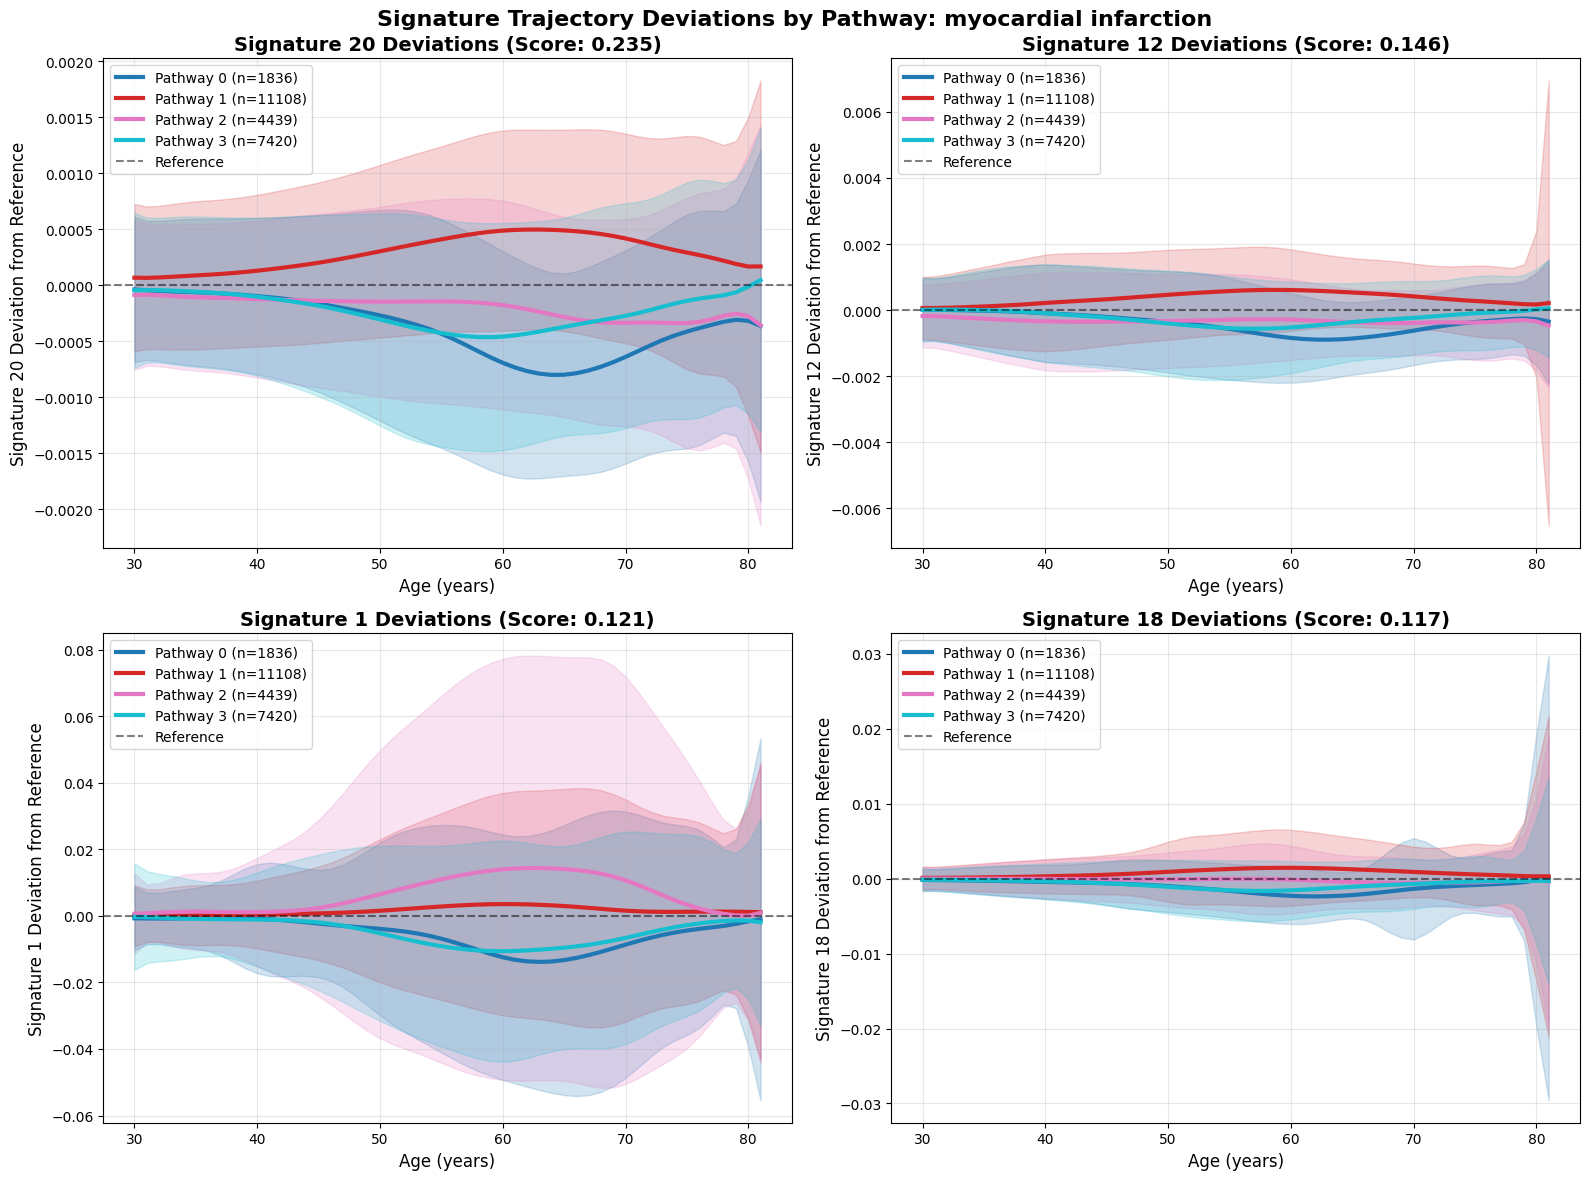

   Saved plot: complete_pathway_analysis_output/ukb_pathway_discovery/pathway_size_and_age.pdf


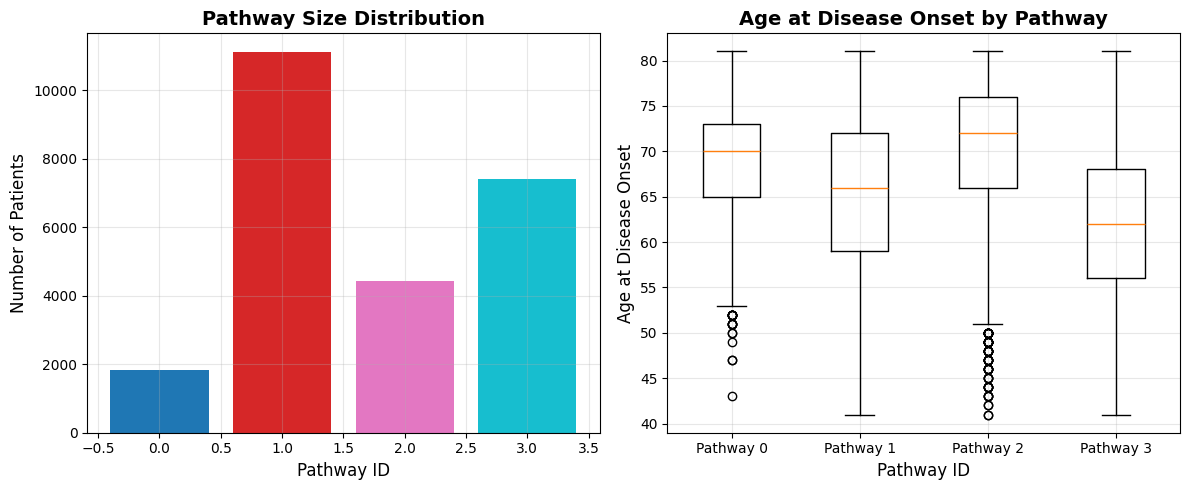


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:
   Saved plot: complete_pathway_analysis_output/ukb_pathway_discovery/signature_deviations_by_pathway.pdf


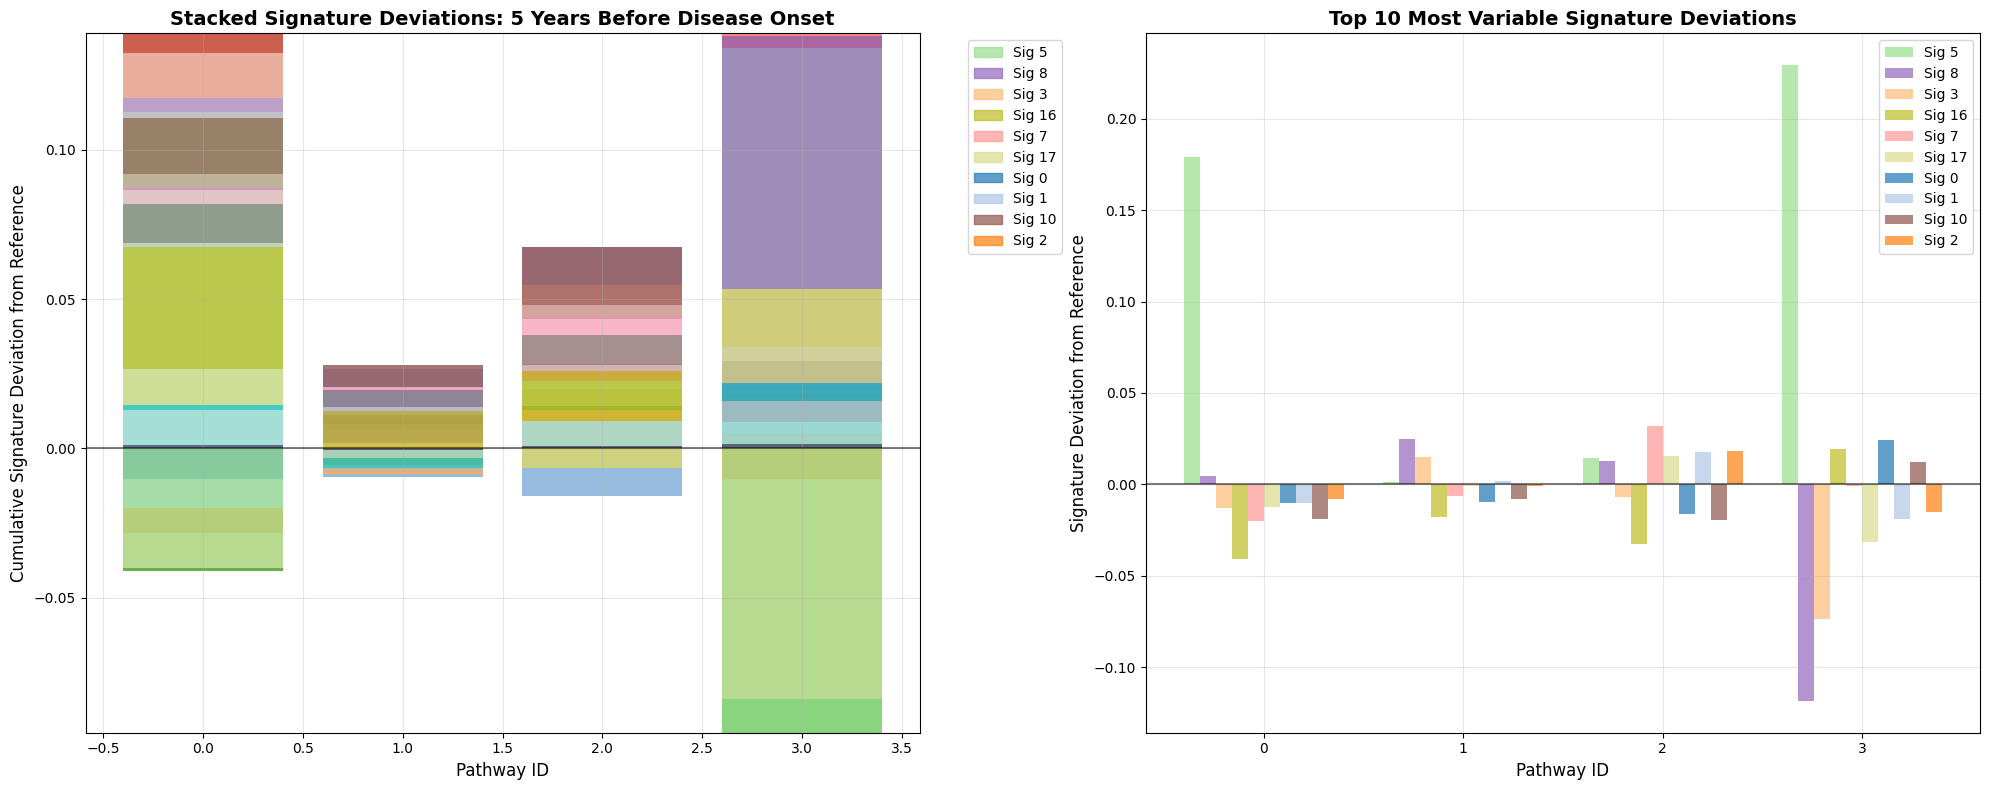


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.370
    Top 3 signatures: [(5, 0.17910814), (16, -0.041025706), (7, -0.019809388)]
  Pathway 1: Total absolute deviation = 0.112
    Top 3 signatures: [(8, 0.02484078), (16, -0.017946318), (3, 0.0149342865)]
  Pathway 2: Total absolute deviation = 0.223
    Top 3 signatures: [(16, -0.032341897), (7, 0.031873554), (10, -0.019288678)]
  Pathway 3: Total absolute deviation = 0.615
    Top 3 signatures: [(5, 0.22926128), (8, -0.118373916), (3, -0.073842525)]

3b. CREATING SIGNATURE DEVIATION PLOTS
   Saved stacked deviation plot: complete_pathway_analysis_output/ukb_pathway_discovery/signature_deviations_myocardial_infarction_10yr_stacked.pdf
   Saved line deviation plot: complete_pathway_analysis_output/ukb_pathway_discovery/signature_deviations_myocardial_infarction_10yr_line.pdf

4. ANALYZING MEDICATION DIFFERENCES BY PATHWAY
=== INTEGRATING LONG-TERM MEDICATIONS WITH SIGNATURE PATHWAYS 

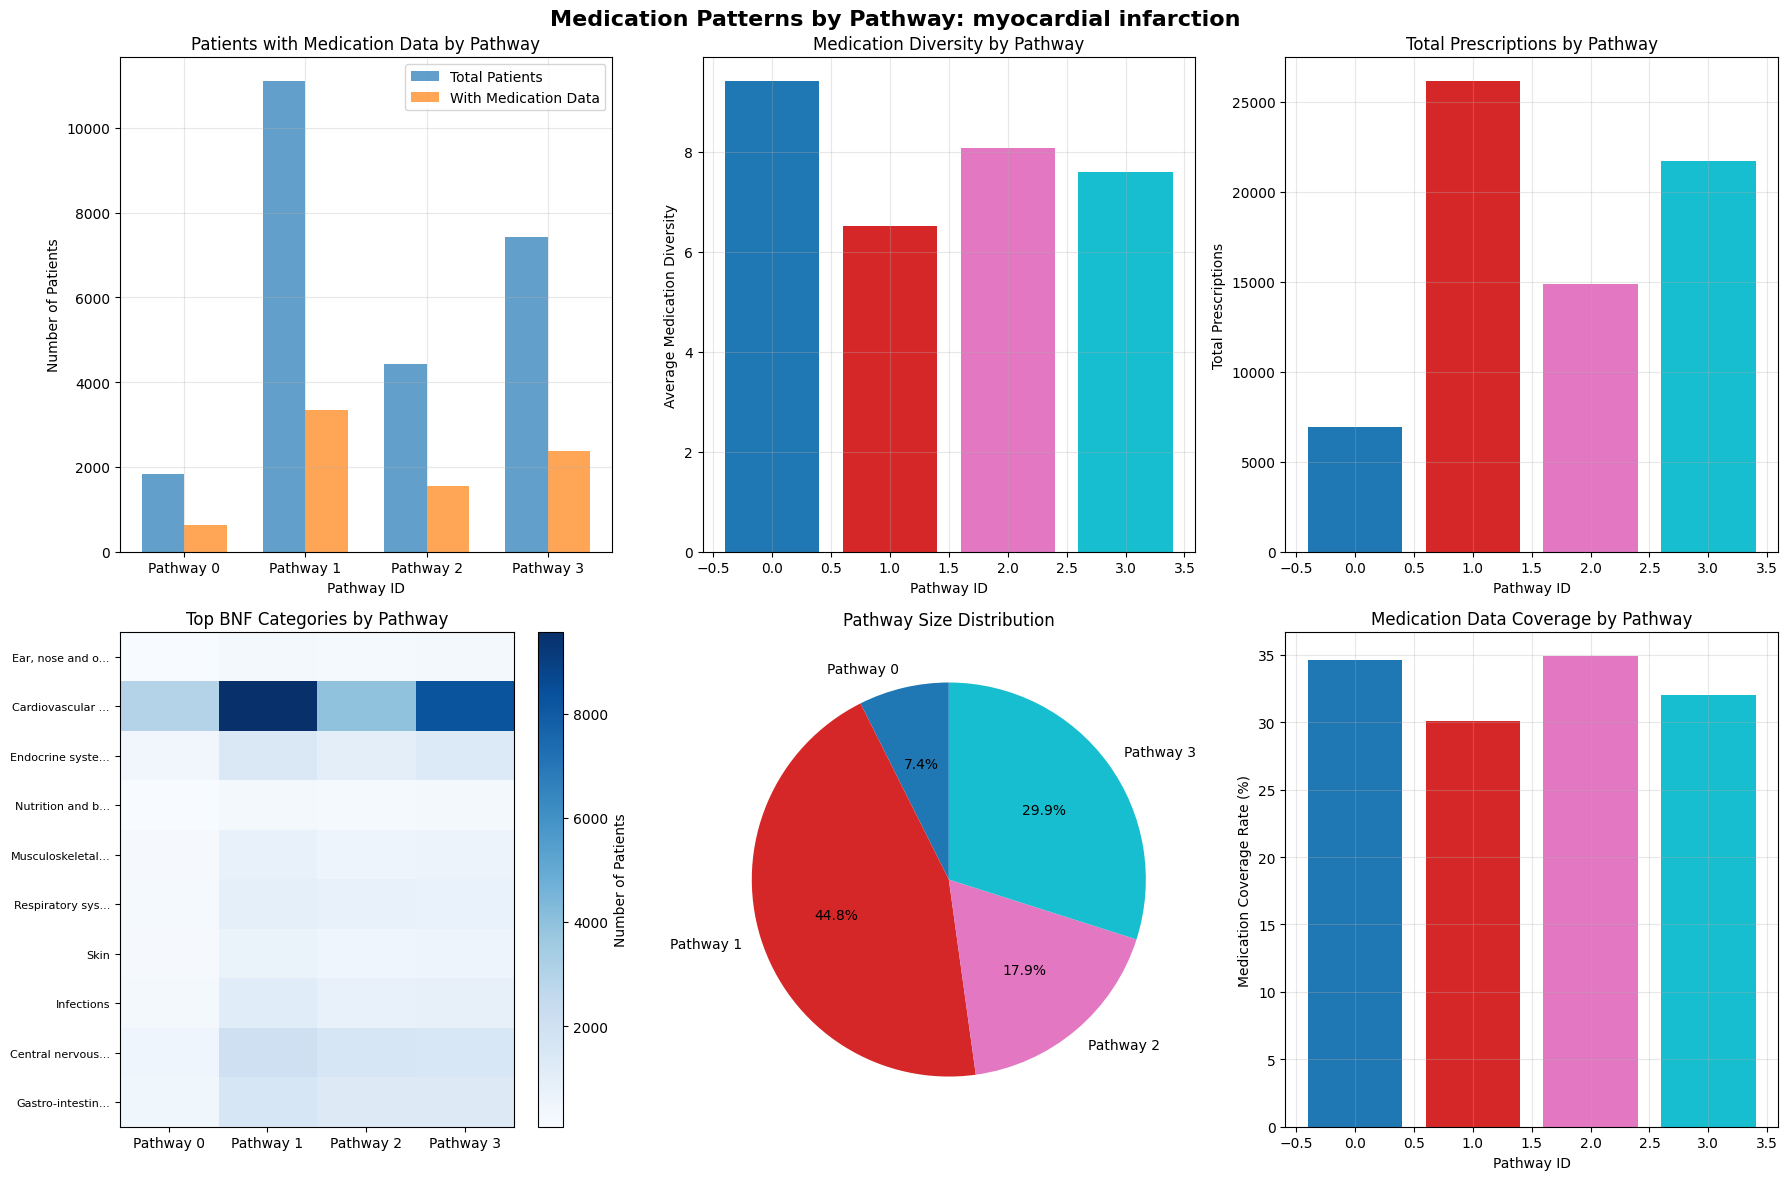


=== MEDICATION INTEGRATION SUMMARY ===
Target Disease: myocardial infarction
Total Pathways: 4
Total Patients: 24803
Patients with Medication Data: 7902

Pathway 0:
  Patients: 1836
  With meds: 636
  Coverage: 34.6%
  Medication diversity: 9.42
  Total prescriptions: 6949

Pathway 1:
  Patients: 11108
  With meds: 3343
  Coverage: 30.1%
  Medication diversity: 6.52
  Total prescriptions: 26169

Pathway 2:
  Patients: 4439
  With meds: 1550
  Coverage: 34.9%
  Medication diversity: 8.08
  Total prescriptions: 14871

Pathway 3:
  Patients: 7420
  With meds: 2373
  Coverage: 32.0%
  Medication diversity: 7.60
  Total prescriptions: 21700

5. ANALYZING PRS DIFFERENCES BY PATHWAY

=== ANALYZING POLYGENIC RISK SCORES BY PATHWAY ===
✅ Loaded PRS data: (400000, 37)
Available PRS columns: ['PatientID', 'AAM', 'AMD', 'AD', 'AST', 'AF', 'BD', 'BMI', 'CRC', 'BC', 'CVD', 'CED', 'CAD', 'CD', 'EOC', 'EBMDT', 'HBA1C_DF', 'HEIGHT', 'HDL', 'HT', 'IOP', 'ISS', 'LDL_SF', 'MEL', 'MS', 'OP', 'PD', 'POAG',

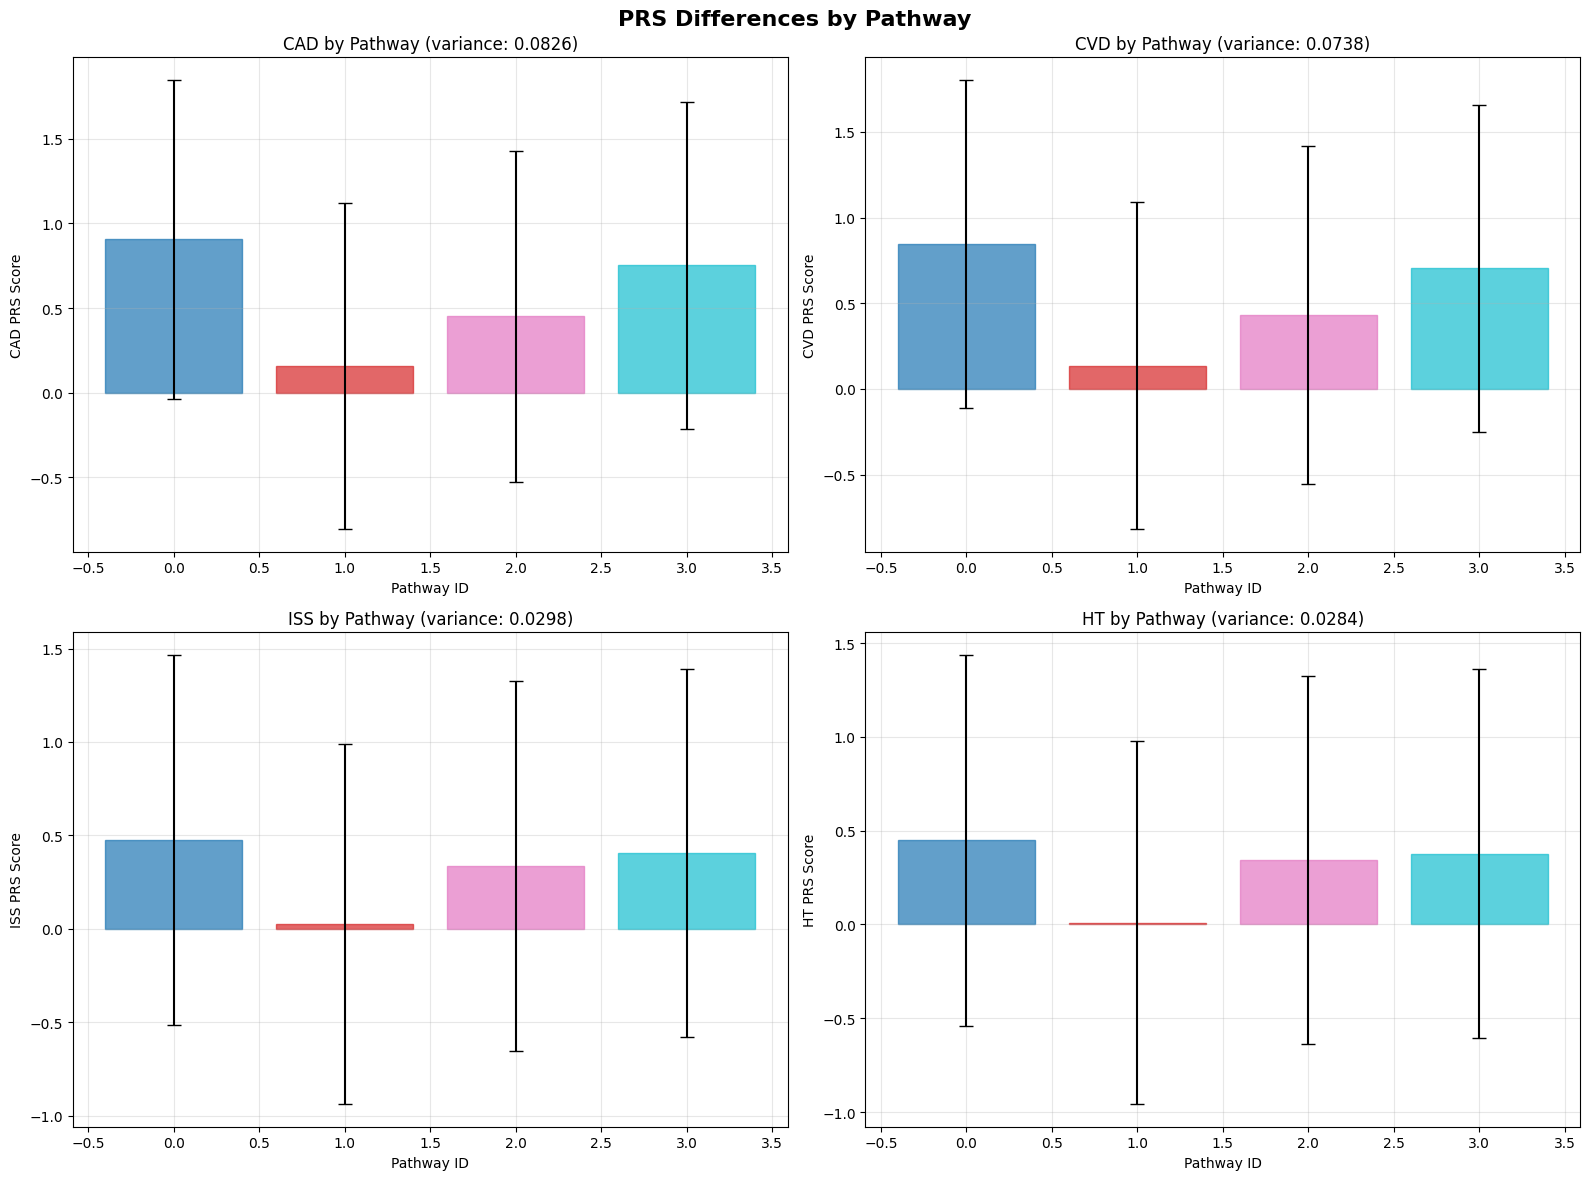


6. ANALYZING GRANULAR DISEASE PATTERNS

=== ANALYZING GRANULAR DISEASE PATTERNS BY PATHWAY ===
Including diseases with ≥1.0% prevalence in at least one pathway

DISEASES THAT DIFFERENTIATE PATHWAYS (including rare diseases):
Found 236 diseases with sufficient prevalence
Top 20 diseases that differentiate pathways (including rare diseases):

1. Coronary atherosclerosis (max prevalence: 86.3%):
   Pathway 0: 1584 patients (86.3%)
   Pathway 1: 927 patients (8.3%)
   Pathway 2: 902 patients (20.3%)
   Pathway 3: 1183 patients (15.9%)

2. Angina pectoris (max prevalence: 75.0%):
   Pathway 0: 1377 patients (75.0%)
   Pathway 1: 823 patients (7.4%)
   Pathway 2: 1014 patients (22.8%)
   Pathway 3: 915 patients (12.3%)

3. Other chronic ischemic heart disease, unspecified (max prevalence: 74.7%):
   Pathway 0: 1371 patients (74.7%)
   Pathway 1: 982 patients (8.8%)
   Pathway 2: 1048 patients (23.6%)
   Pathway 3: 935 patients (12.6%)

4. Hypercholesterolemia (max prevalence: 75.9%):
   Pat

In [3]:
# ============================================================================
# STEP 1: DEVIATION-BASED PATHWAY DISCOVERY (UKB)
# ============================================================================
# This will:
# 1. Load full dataset (Y, thetas, disease_names, processed_ids)
#    - Thetas loaded from: new_thetas_with_pcs_retrospective.pt (discovery thetas)
# 2. Discover pathways using deviation-from-reference clustering
# 3. Interrogate pathways (signatures, diseases, medications, PRS)
# 4. Generate all visualizations
# 5. Save results to output directory

os.makedirs(output_dir, exist_ok=True)
results = {}

print("="*80)
print("STEP 1: PATHWAY DISCOVERY (UKB)")
print("="*80)


# Run the complete analysis
results['ukb'] = run_deviation_only_analysis(
    target_disease=target_disease,
    n_pathways=n_pathways,
    output_dir=os.path.join(output_dir, 'ukb_pathway_discovery'),
    lookback_years=lookback_years
)

print("\n✅ UKB pathway discovery complete")


## STEP 2: Transition Analysis (UKB vs MGB)

Analyze transitions from precursor disease to target disease:



STEP 2: TRANSITION ANALYSIS
TRANSITION ANALYSIS: UKB vs MGB
Precursor: Rheumatoid arthritis
Target: myocardial infarction
Years before: 10

STEP 1: LOADING UKB DATA
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
✅ UKB data loaded:
   Y shape: torch.Size([400000, 348, 52])
   Thetas shape: (400000, 21, 52)
   Diseases: 348

🔍 Checking if diseases exist in UKB...

Searching for: 'Rheumatoid arthritis'
Found 2 potential matches:
  [297] Rheumatoid arthritis                                         (score: 100.0, type: exact_substring)
  [325] Osteoarthritis; localized                                    (score: 30.0, type: single_term)

Searching for: 'myocardial infarction'
Found 2 potential matches:
  [112] Myocardial infarction                                        (score: 100.0, 

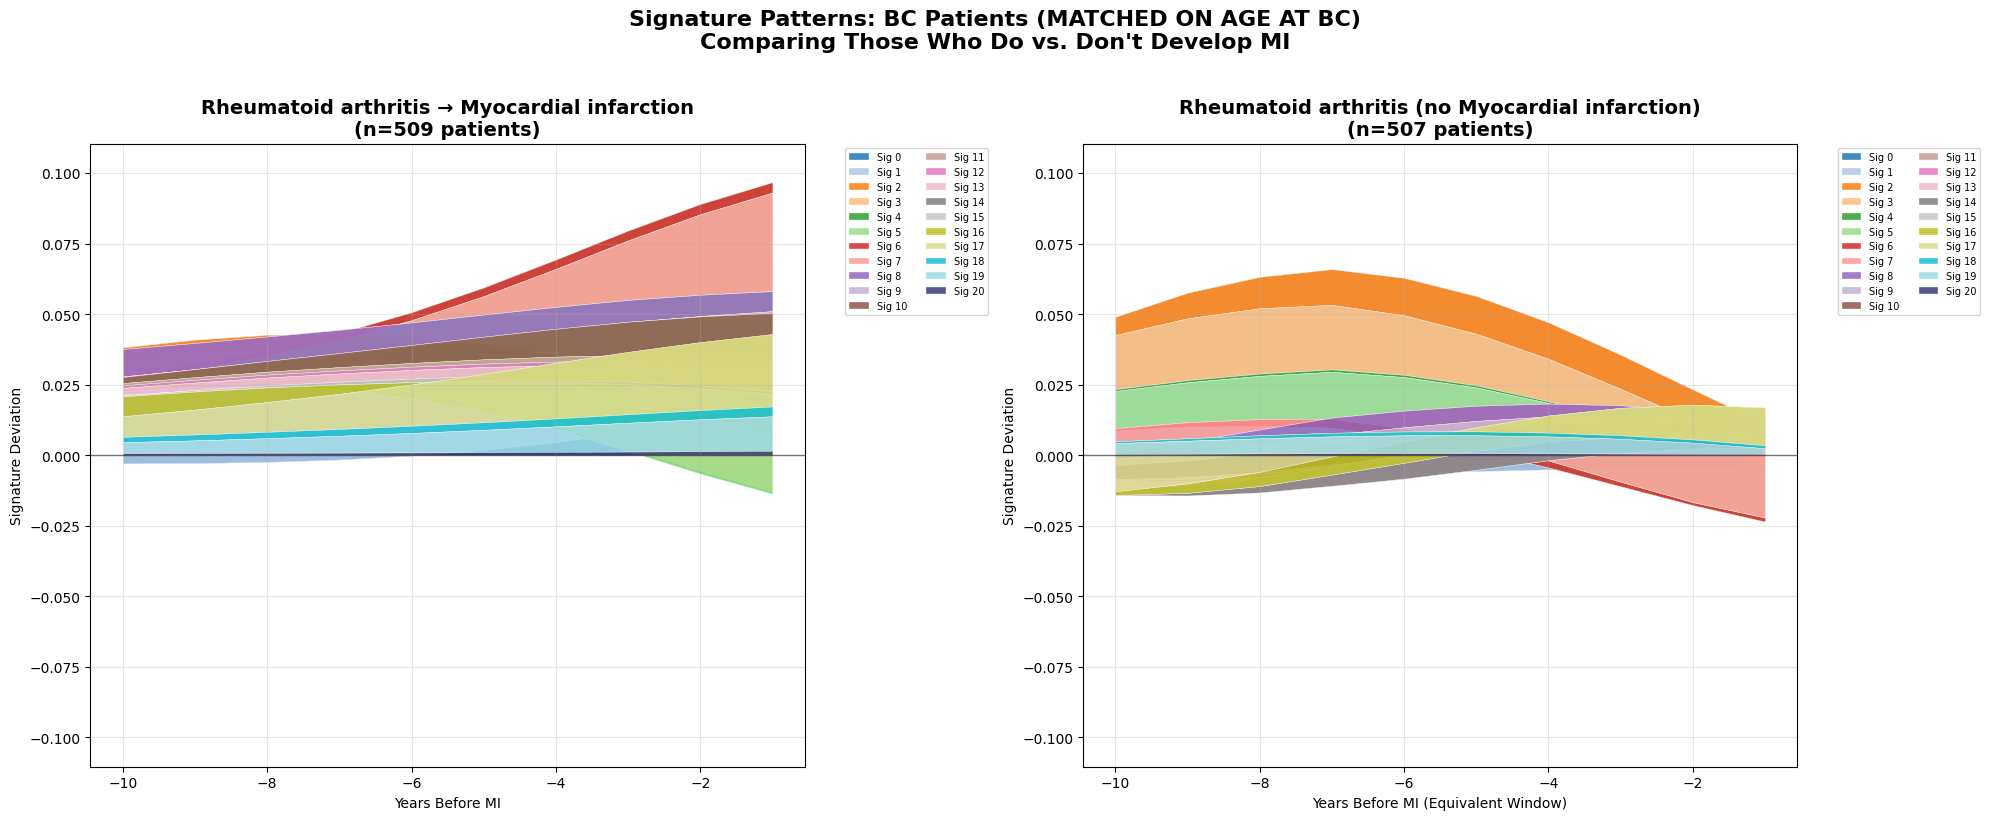

Line plot saved as 'bc_progression_line_plot_Rheumatoid_arthritis.png'


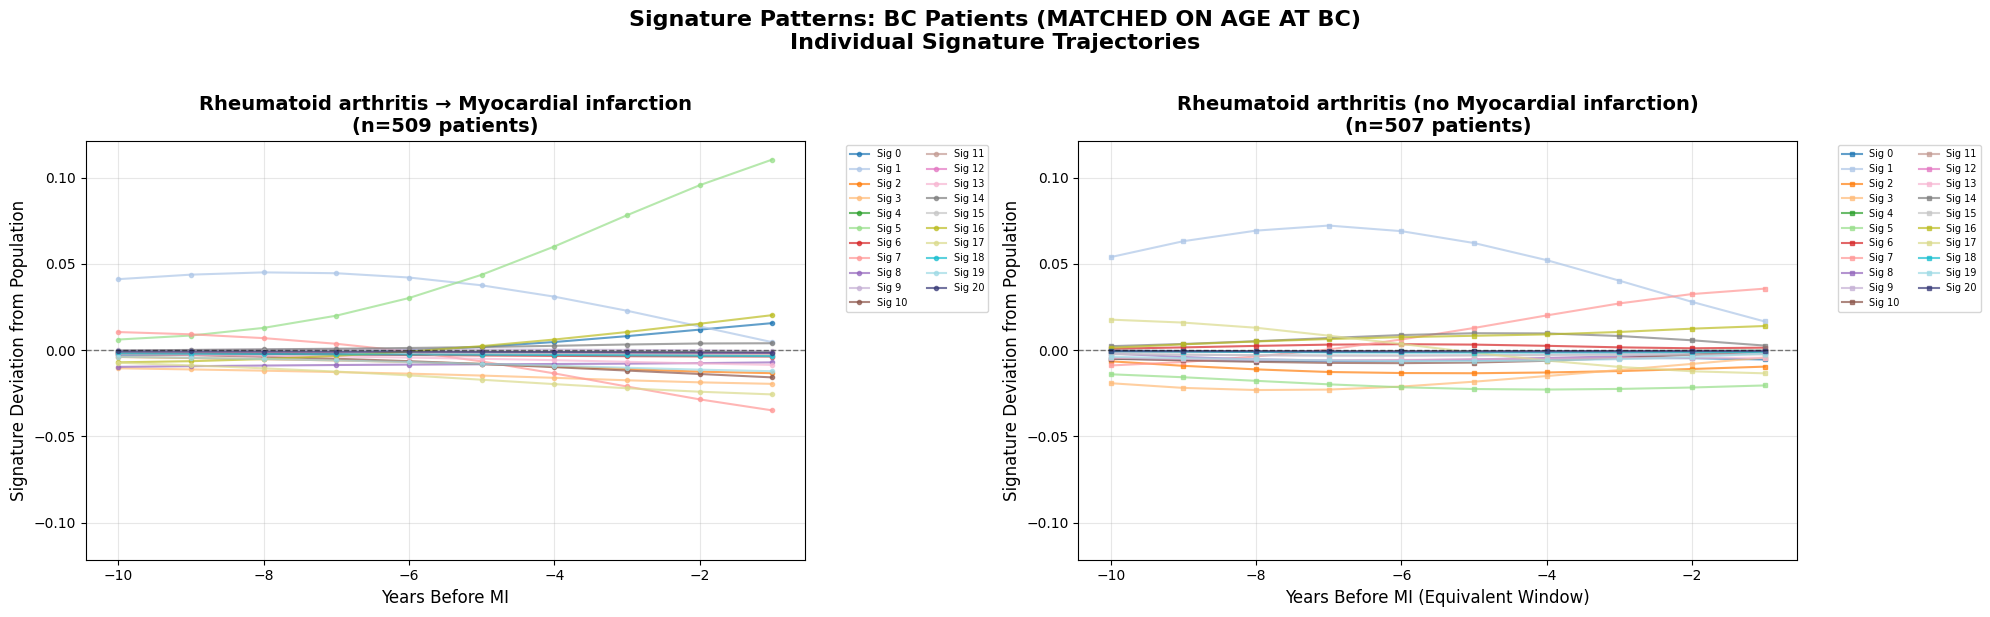


STEP 3: LOADING MGB DATA
LOADING MGB MODEL DATA

Loading MGB model from: /Users/sarahurbut/Dropbox-Personal/model_with_kappa_bigam_MGB.pt
Model keys: ['model_state_dict', 'clusters', 'psi', 'Y', 'prevalence_t', 'logit_prevalence_t', 'G', 'E', 'disease_names', 'hyperparameters']

MGB Data shapes:
  Y: (34592, 346, 51)
  Lambda: (34592, 21, 51)
  Thetas: (34592, 21, 51)
  Disease names: 346 diseases
✅ MGB data loaded:
   Y shape: torch.Size([34592, 346, 51])
   Thetas shape: (34592, 21, 51)
   Diseases: 346

🔍 Checking if diseases exist in MGB...

Searching for: 'Rheumatoid arthritis'
Found 2 potential matches:
  [295] Rheumatoid arthritis                                         (score: 100.0, type: exact_substring)
  [323] Osteoarthritis; localized                                    (score: 30.0, type: single_term)

Searching for: 'myocardial infarction'
Found 2 potential matches:
  [112] Myocardial infarction                                        (score: 100.0, type: exact_substring)

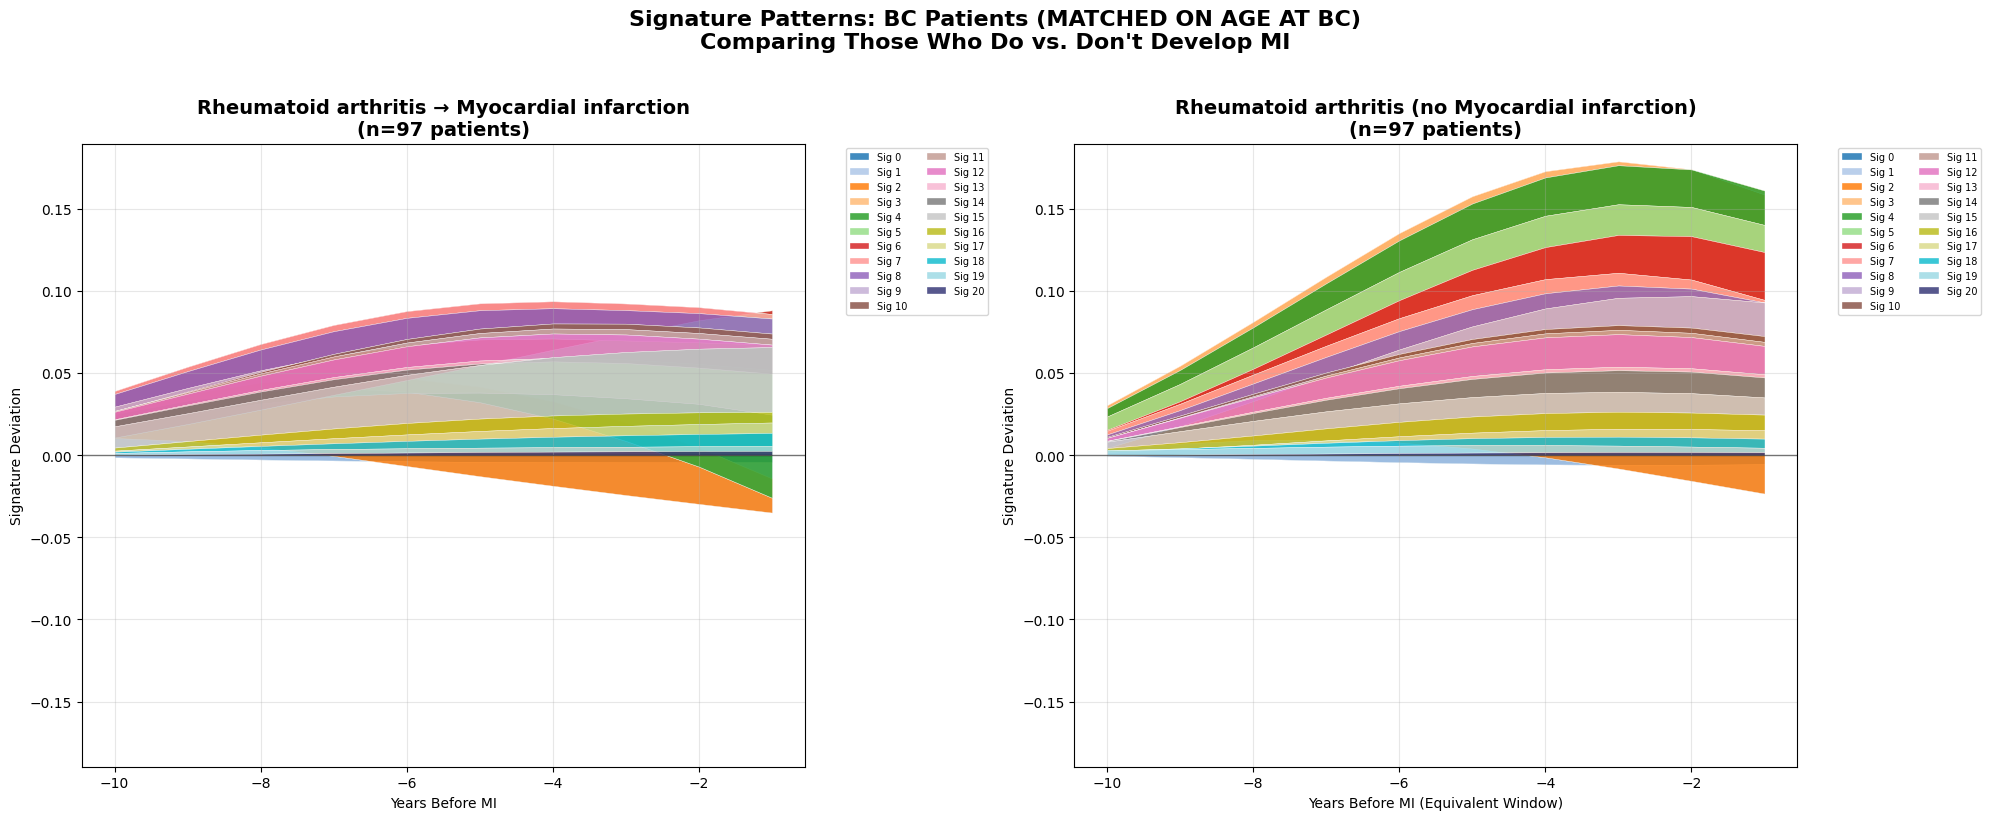

Line plot saved as 'bc_progression_line_plot_Rheumatoid_arthritis.png'


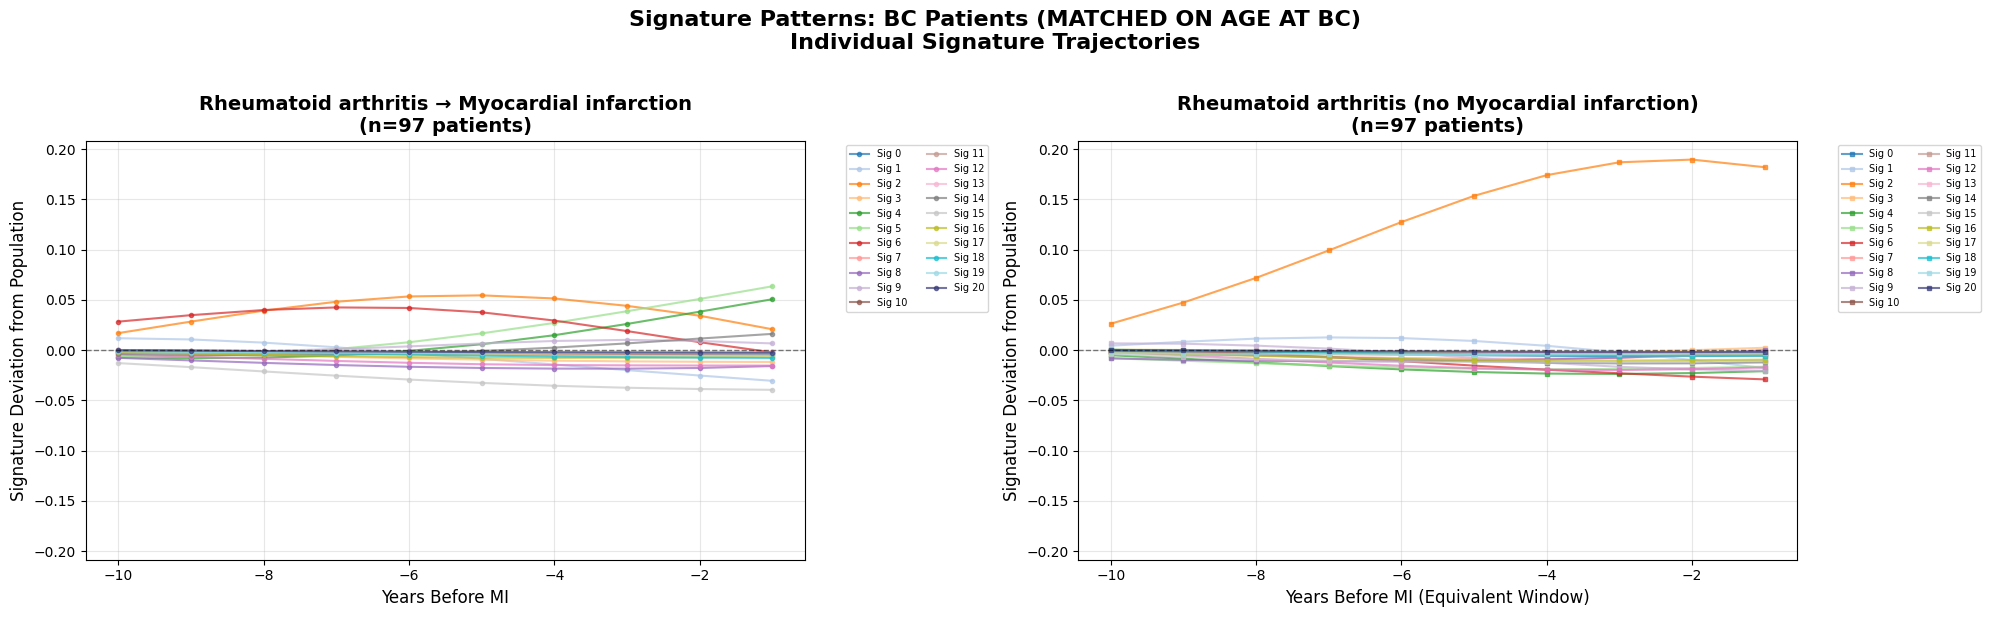


STEP 5: COMPARING UKB vs MGB RESULTS

📊 SUMMARY STATISTICS:
--------------------------------------------------------------------------------

Sample Sizes:
  UKB: 509 progressors, 507 non-progressors
       509 matched pairs
  MGB: 97 progressors, 97 non-progressors
       99 matched pairs

Signature Trajectories:
  UKB shape: (21, 10)
  MGB shape: (21, 10)

  Comparing 21 signatures...
  Average signature trajectory correlation: 0.489

  Top 5 most similar signatures (by trajectory correlation):
    Signature 5: correlation = 0.999
    Signature 17: correlation = 0.982
    Signature 18: correlation = 0.975
    Signature 3: correlation = 0.954
    Signature 11: correlation = 0.950

  📊 SIGNATURE 3 DETAILED COMPARISON:
  --------------------------------------------------------------------------------

  UKB:
    Progressors (RA → MI):     mean = -0.0146
    Non-progressors (RA only): mean = -0.0165
    Difference (NP - Prog):     -0.0019
    Pattern: Prog > NP

  MGB:
    Progressors (

In [4]:
# ============================================================================
# STEP 2: TRANSITION ANALYSIS (UKB vs MGB)
# ============================================================================
# Analyze transitions from precursor disease to target disease across cohorts

print("\n" + "="*80)
print("STEP 2: TRANSITION ANALYSIS")
print("="*80)

results['transition'] = run_transition_analysis_both_cohorts(
    transition_disease_name=transition_disease,
    target_disease_name=target_disease,
    years_before=lookback_years,
    age_tolerance=5,
    min_followup=5,
    mgb_model_path=mgb_model_path,
    output_dir=os.path.join(output_dir, 'transition_analysis')
)

print("\n✅ Transition analysis complete")


## STEP 3: Signature 5 Analysis with FH Carriers

Analyze Signature 5 patterns by pathway with familial hypercholesterolemia carriers:


In [5]:
# ============================================================================
# STEP 3: SIGNATURE 5 ANALYSIS
# ============================================================================
# Analyze Signature 5 patterns by pathway with FH (familial hypercholesterolemia) carriers

print("\n" + "="*80)
print("STEP 3: SIGNATURE 5 ANALYSIS")
print("="*80)

results['sig5'] = analyze_signature5_by_pathway(
    target_disease=target_disease,
    output_dir=os.path.join(output_dir, 'ukb_pathway_discovery'),
    fh_carrier_path='/Users/sarahurbut/Downloads/out/ukb_exome_450k_fh.carrier.txt'
)

print("\n✅ Signature 5 analysis complete")



STEP 3: SIGNATURE 5 ANALYSIS
ANALYZING SIGNATURE 5 IN EACH MI PATHWAY
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000

Analyzing 4 pathways...

Loading FH carrier data from: /Users/sarahurbut/Downloads/out/ukb_exome_450k_fh.carrier.txt
  ✅ Loaded 2,564 FH carriers
Found precursor disease indices:
  coronary atherosclerosis: index 114
  hypercholesterolemia: index 52
  angina: index 111
  hypertension: index 109
  diabetes: index 46
  obesity: index 60

PATHWAY 0
Number of patients: 1836

Precursor Disease Prevalence (BEFORE MI):
  coronary atherosclerosis: 1584 (86.3%)
  hypercholesterolemia: 1393 (75.9%)
  angina: 647 (35.2%)
  hypertension: 1374 (74.8%)
  diabetes: 63 (3.4%)
  obesity: 216 (11.8%)

Reference population prevalence up to average MI age (≈ 68.9y):
  coronary athero

## STEP 4: Cross-Cohort Reproducibility

Validate pathway reproducibility across UKB and MGB cohorts:



STEP 4: REPRODUCIBILITY VALIDATION
PATHWAY REPRODUCIBILITY ANALYSIS

Step 1: Getting pathway matches...
PATHWAY MATCHING: UKB ↔ MGB

1. Loading UKB results from: complete_pathway_analysis_output/ukb_pathway_discovery/complete_analysis_results.pkl
   ✅ UKB results loaded

2. Running MGB analysis (force_rerun=False)...
MGB DEVIATION-BASED PATHWAY ANALYSIS: MYOCARDIAL INFARCTION
LOADING MGB MODEL DATA

Loading MGB model from: /Users/sarahurbut/Dropbox-Personal/model_with_kappa_bigam_MGB.pt
Model keys: ['model_state_dict', 'clusters', 'psi', 'Y', 'prevalence_t', 'logit_prevalence_t', 'G', 'E', 'disease_names', 'hyperparameters']

MGB Data shapes:
  Y: (34592, 346, 51)
  Lambda: (34592, 21, 51)
  Thetas: (34592, 21, 51)
  Disease names: 346 diseases

MGB Dataset:
  Patients: 34,592
  Diseases: 346
  Signatures: 21
  Time points: 51

1. DISCOVERING PATHWAYS USING DEVIATION-FROM-REFERENCE METHOD
   (10-year lookback, 4 pathways)
=== DISCOVERING PATHWAYS TO MYOCARDIAL INFARCTION ===
Method: d

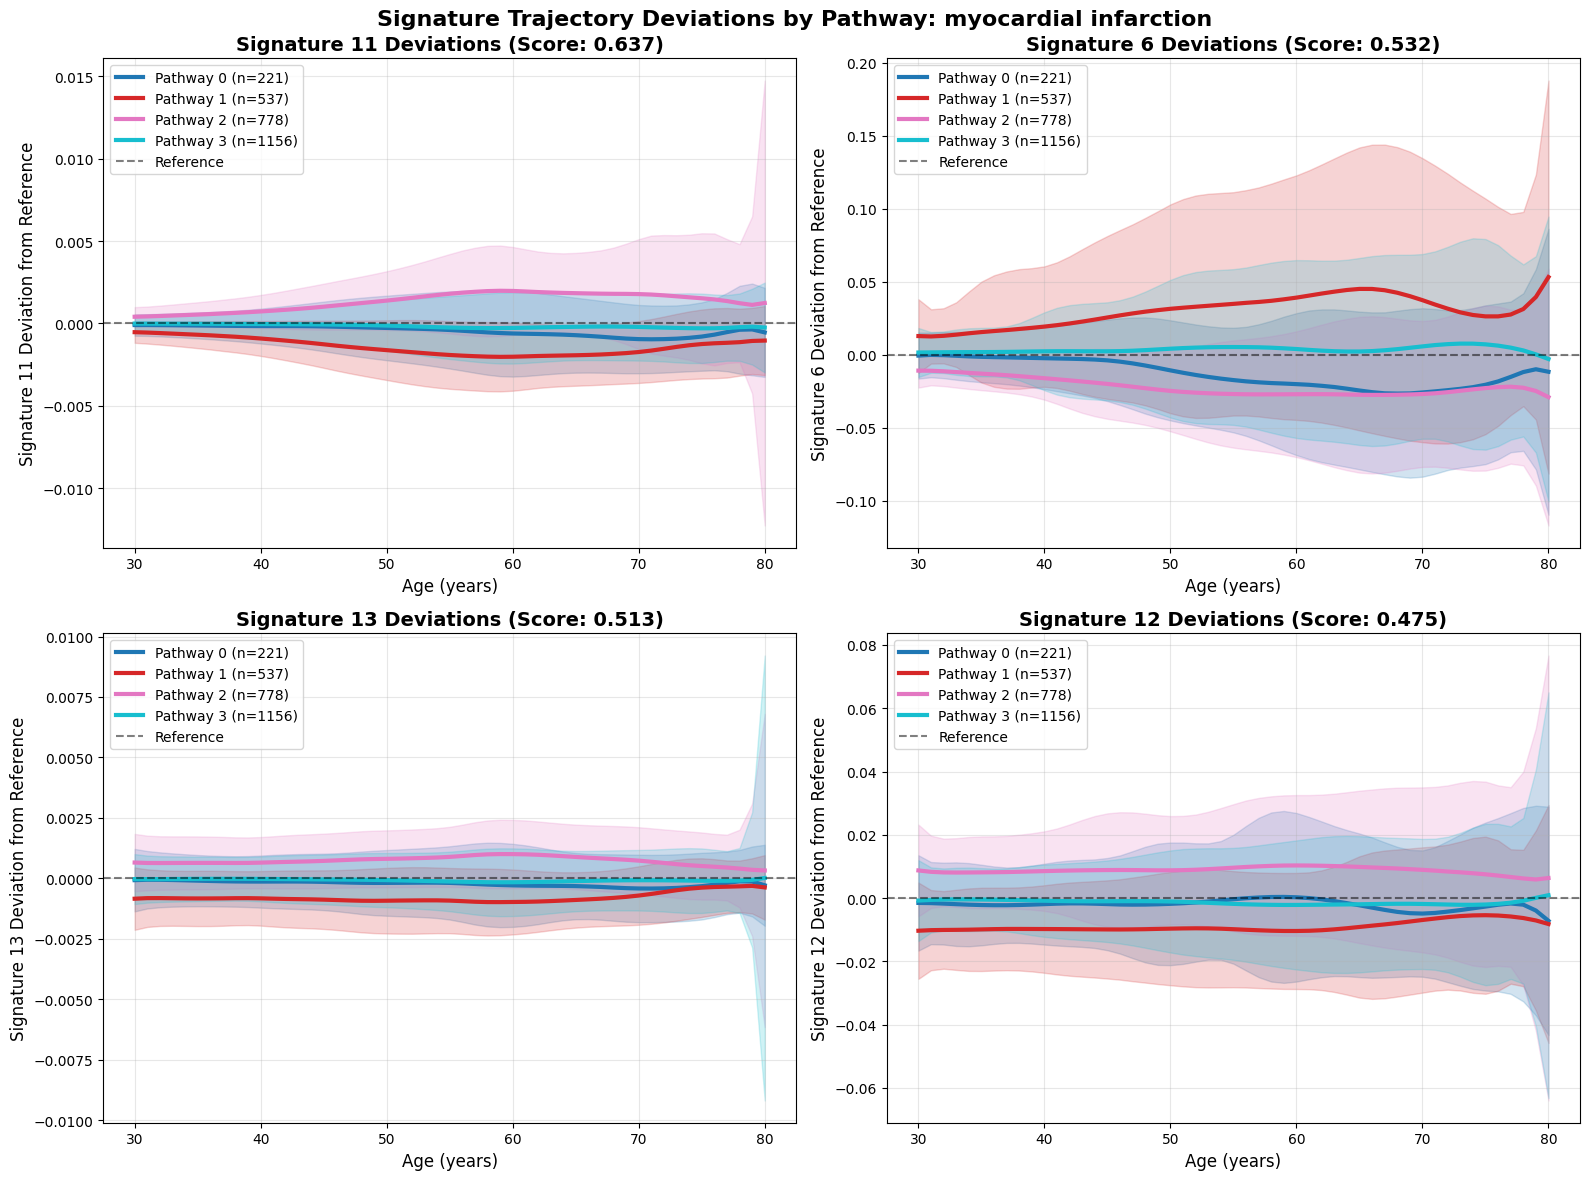

   Saved plot: mgb_deviation_analysis_output/pathway_size_and_age.pdf


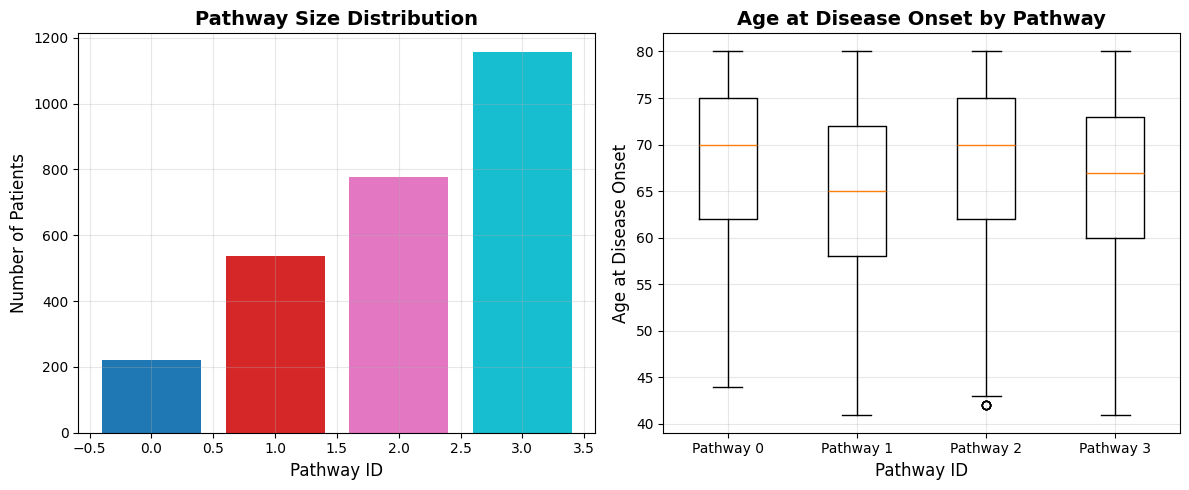


6. CREATING STACKED SIGNATURE DEVIATION PLOTS:
   Saved plot: mgb_deviation_analysis_output/signature_deviations_by_pathway.pdf


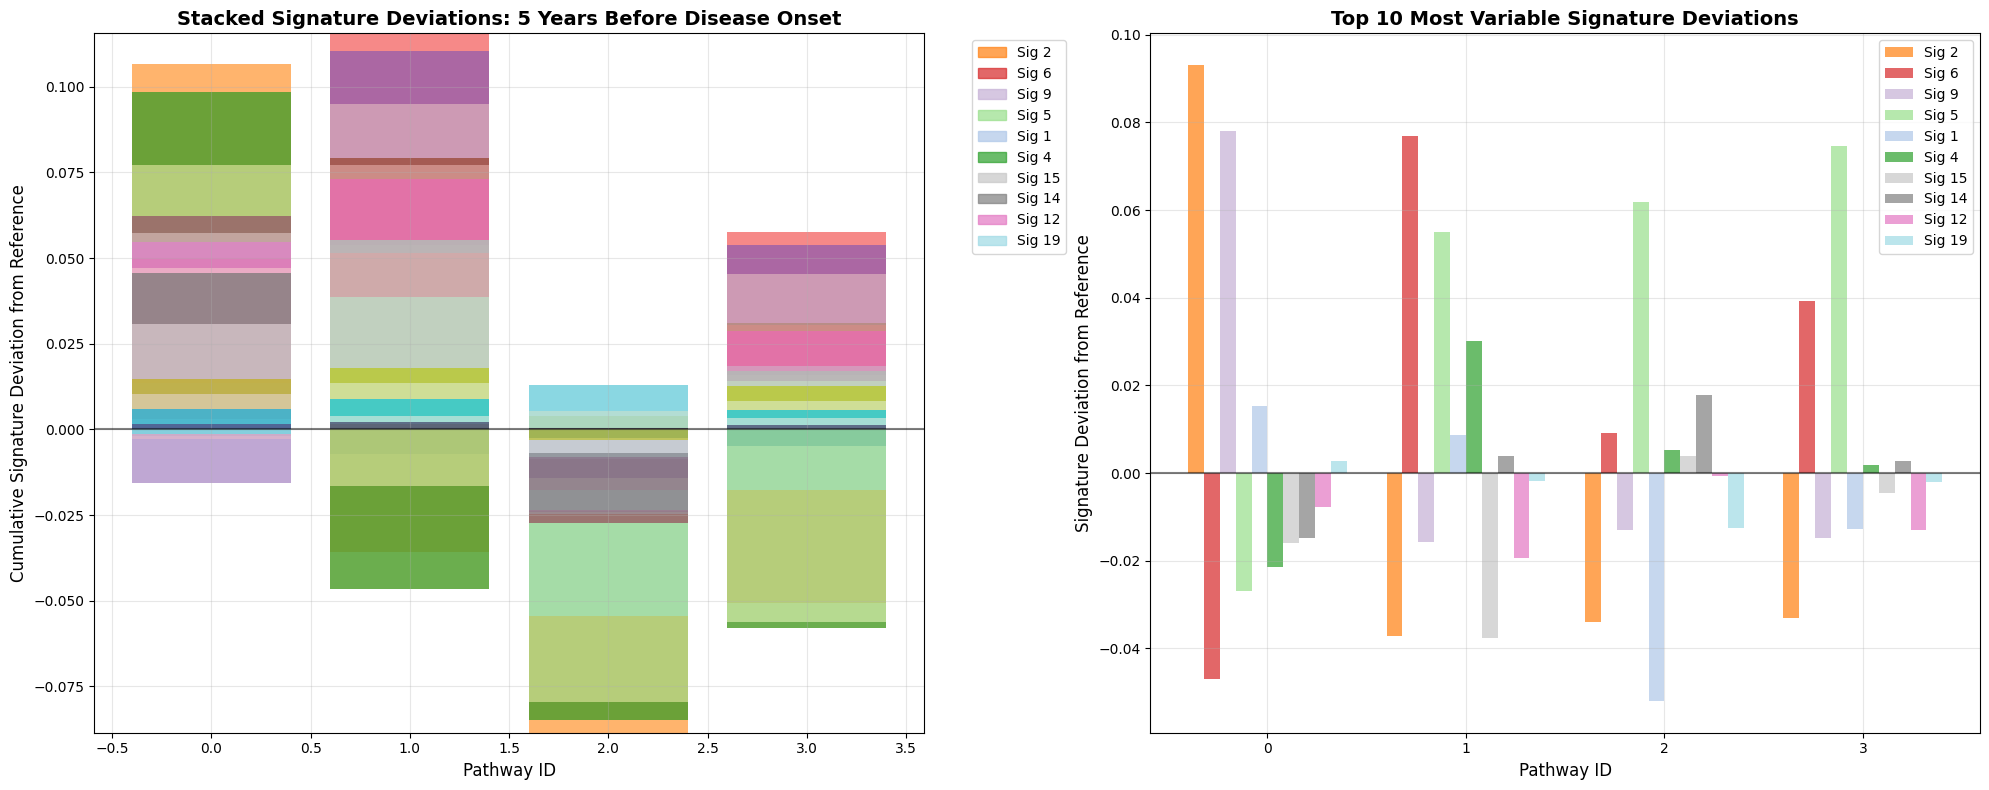


Summary of signature deviations (5 years before disease):
  Pathway 0: Total absolute deviation = 0.379
    Top 3 signatures: [(2, 0.093084544), (9, 0.07810839), (6, -0.047022022)]
  Pathway 1: Total absolute deviation = 0.350
    Top 3 signatures: [(6, 0.076894544), (5, 0.055115283), (15, -0.03755516)]
  Pathway 2: Total absolute deviation = 0.244
    Top 3 signatures: [(5, 0.061932586), (1, -0.052006155), (2, -0.03394649)]
  Pathway 3: Total absolute deviation = 0.238
    Top 3 signatures: [(5, 0.07462637), (6, 0.039245643), (2, -0.033039533)]

3. RUNNING STATISTICAL TESTS ON MGB PATHWAYS
COMPREHENSIVE STATISTICAL TESTS FOR PATHWAY GROUPS

1. Testing disease prevalence differences...
   Found 249 significantly different diseases (FDR < 0.05)

2. Testing signature trajectory differences...
   Found 21 signatures with significant differences (p < 0.05)

3. Testing age at disease onset differences...
   ANOVA: F=16.405, p=0.0000

4. Permutation test for pathway stability...
   Observed

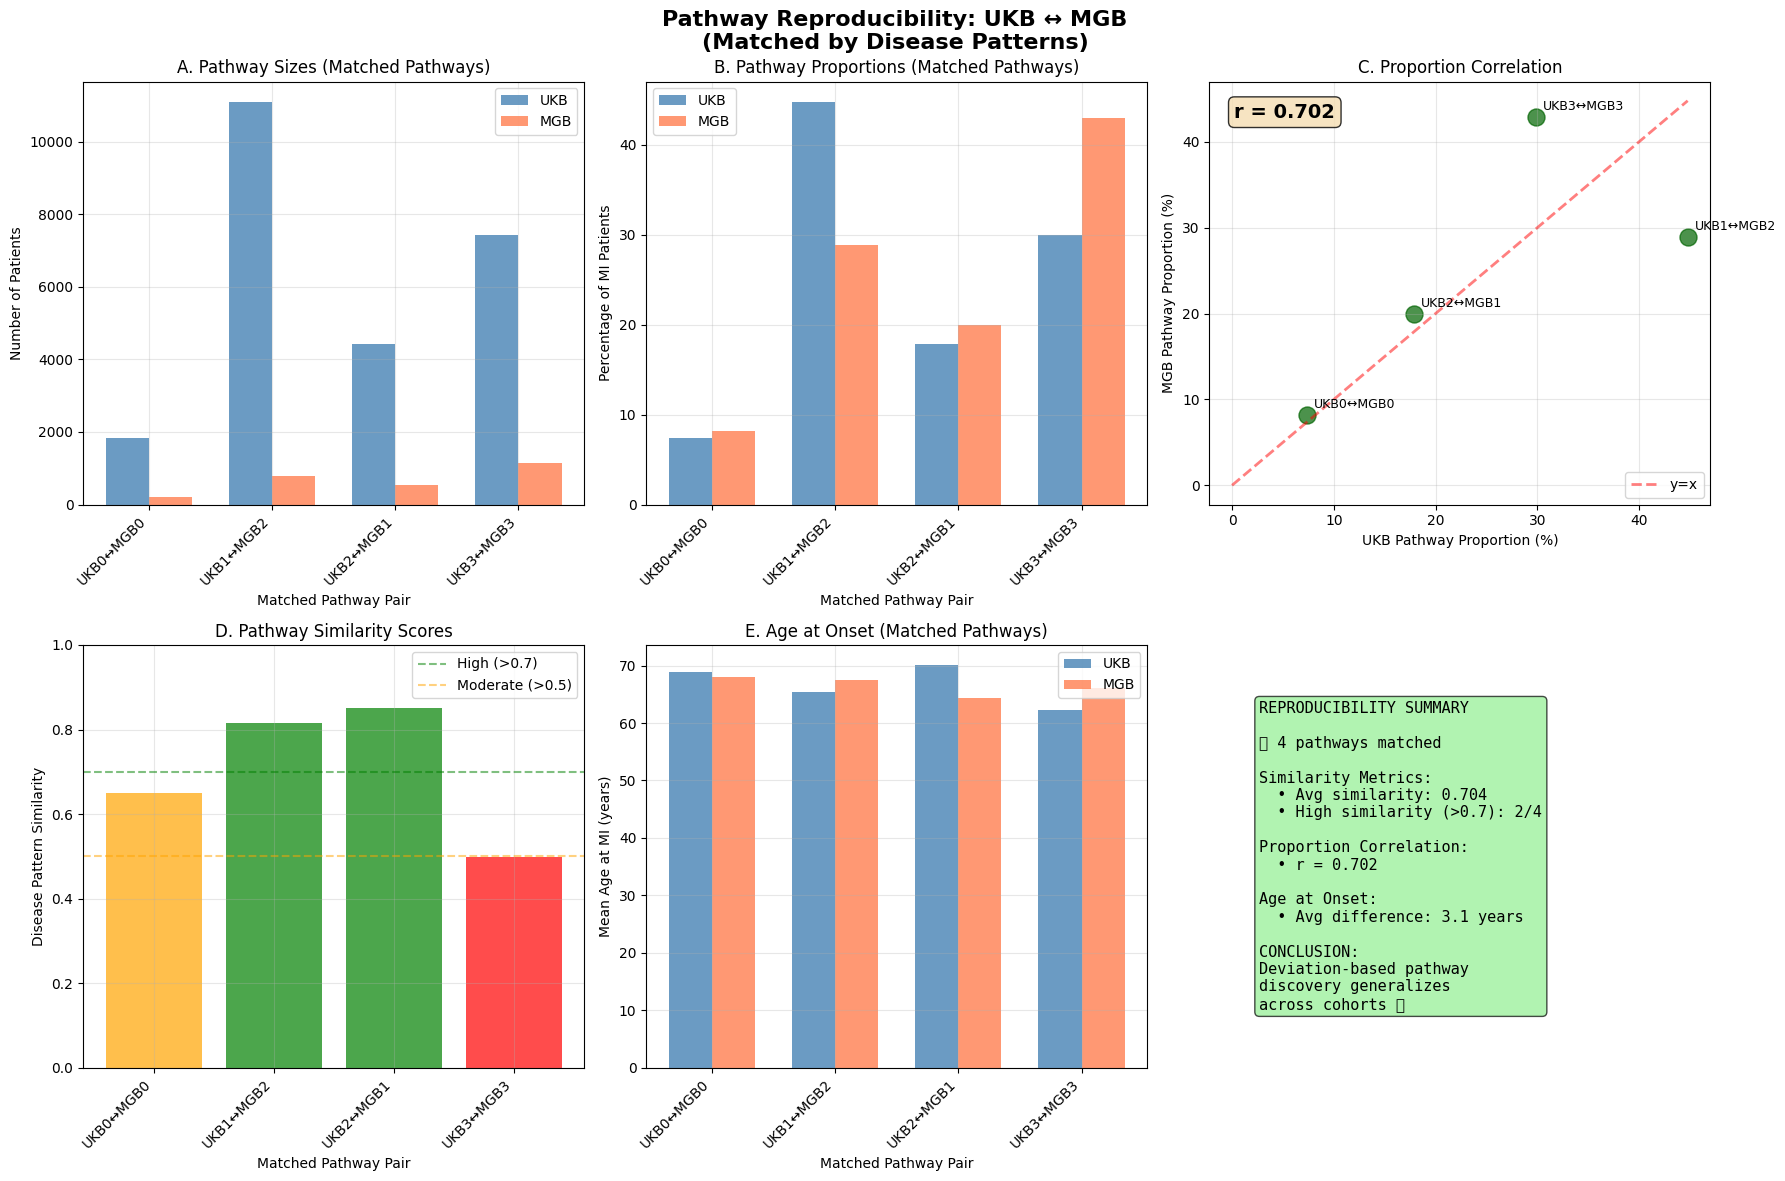


Step 3: Comparing signature patterns...

COMPARING SIGNATURE PATTERNS FOR MATCHED PATHWAYS

⚠️  IMPORTANT: Signature indices are arbitrary across cohorts.
   UKB Sig 5 may not correspond to MGB Sig 5 biologically.
   We compare overall patterns and biological content, not index alignment.
   Pathways are matched by disease enrichment patterns, not signature indices.

1. Computing signature deviation trajectories...
Loading full dataset...
Loaded Y (full): torch.Size([407878, 348, 52])
Loaded thetas: (400000, 21, 52)
Loaded 400000 processed IDs
Subset Y to first 400K patients: torch.Size([400000, 348, 52])
Loaded 348 diseases
Total patients with complete data: 400000
   UKB: 21 signatures, 52 timepoints
   MGB: 21 signatures, 51 timepoints

2. Calculating deviations for matched pathways...
   UKB Pathway 0 ↔ MGB Pathway 0: 1836 vs 221 patients
   UKB Pathway 1 ↔ MGB Pathway 2: 11108 vs 778 patients
   UKB Pathway 2 ↔ MGB Pathway 1: 4439 vs 537 patients
   UKB Pathway 3 ↔ MGB Pathway 3:

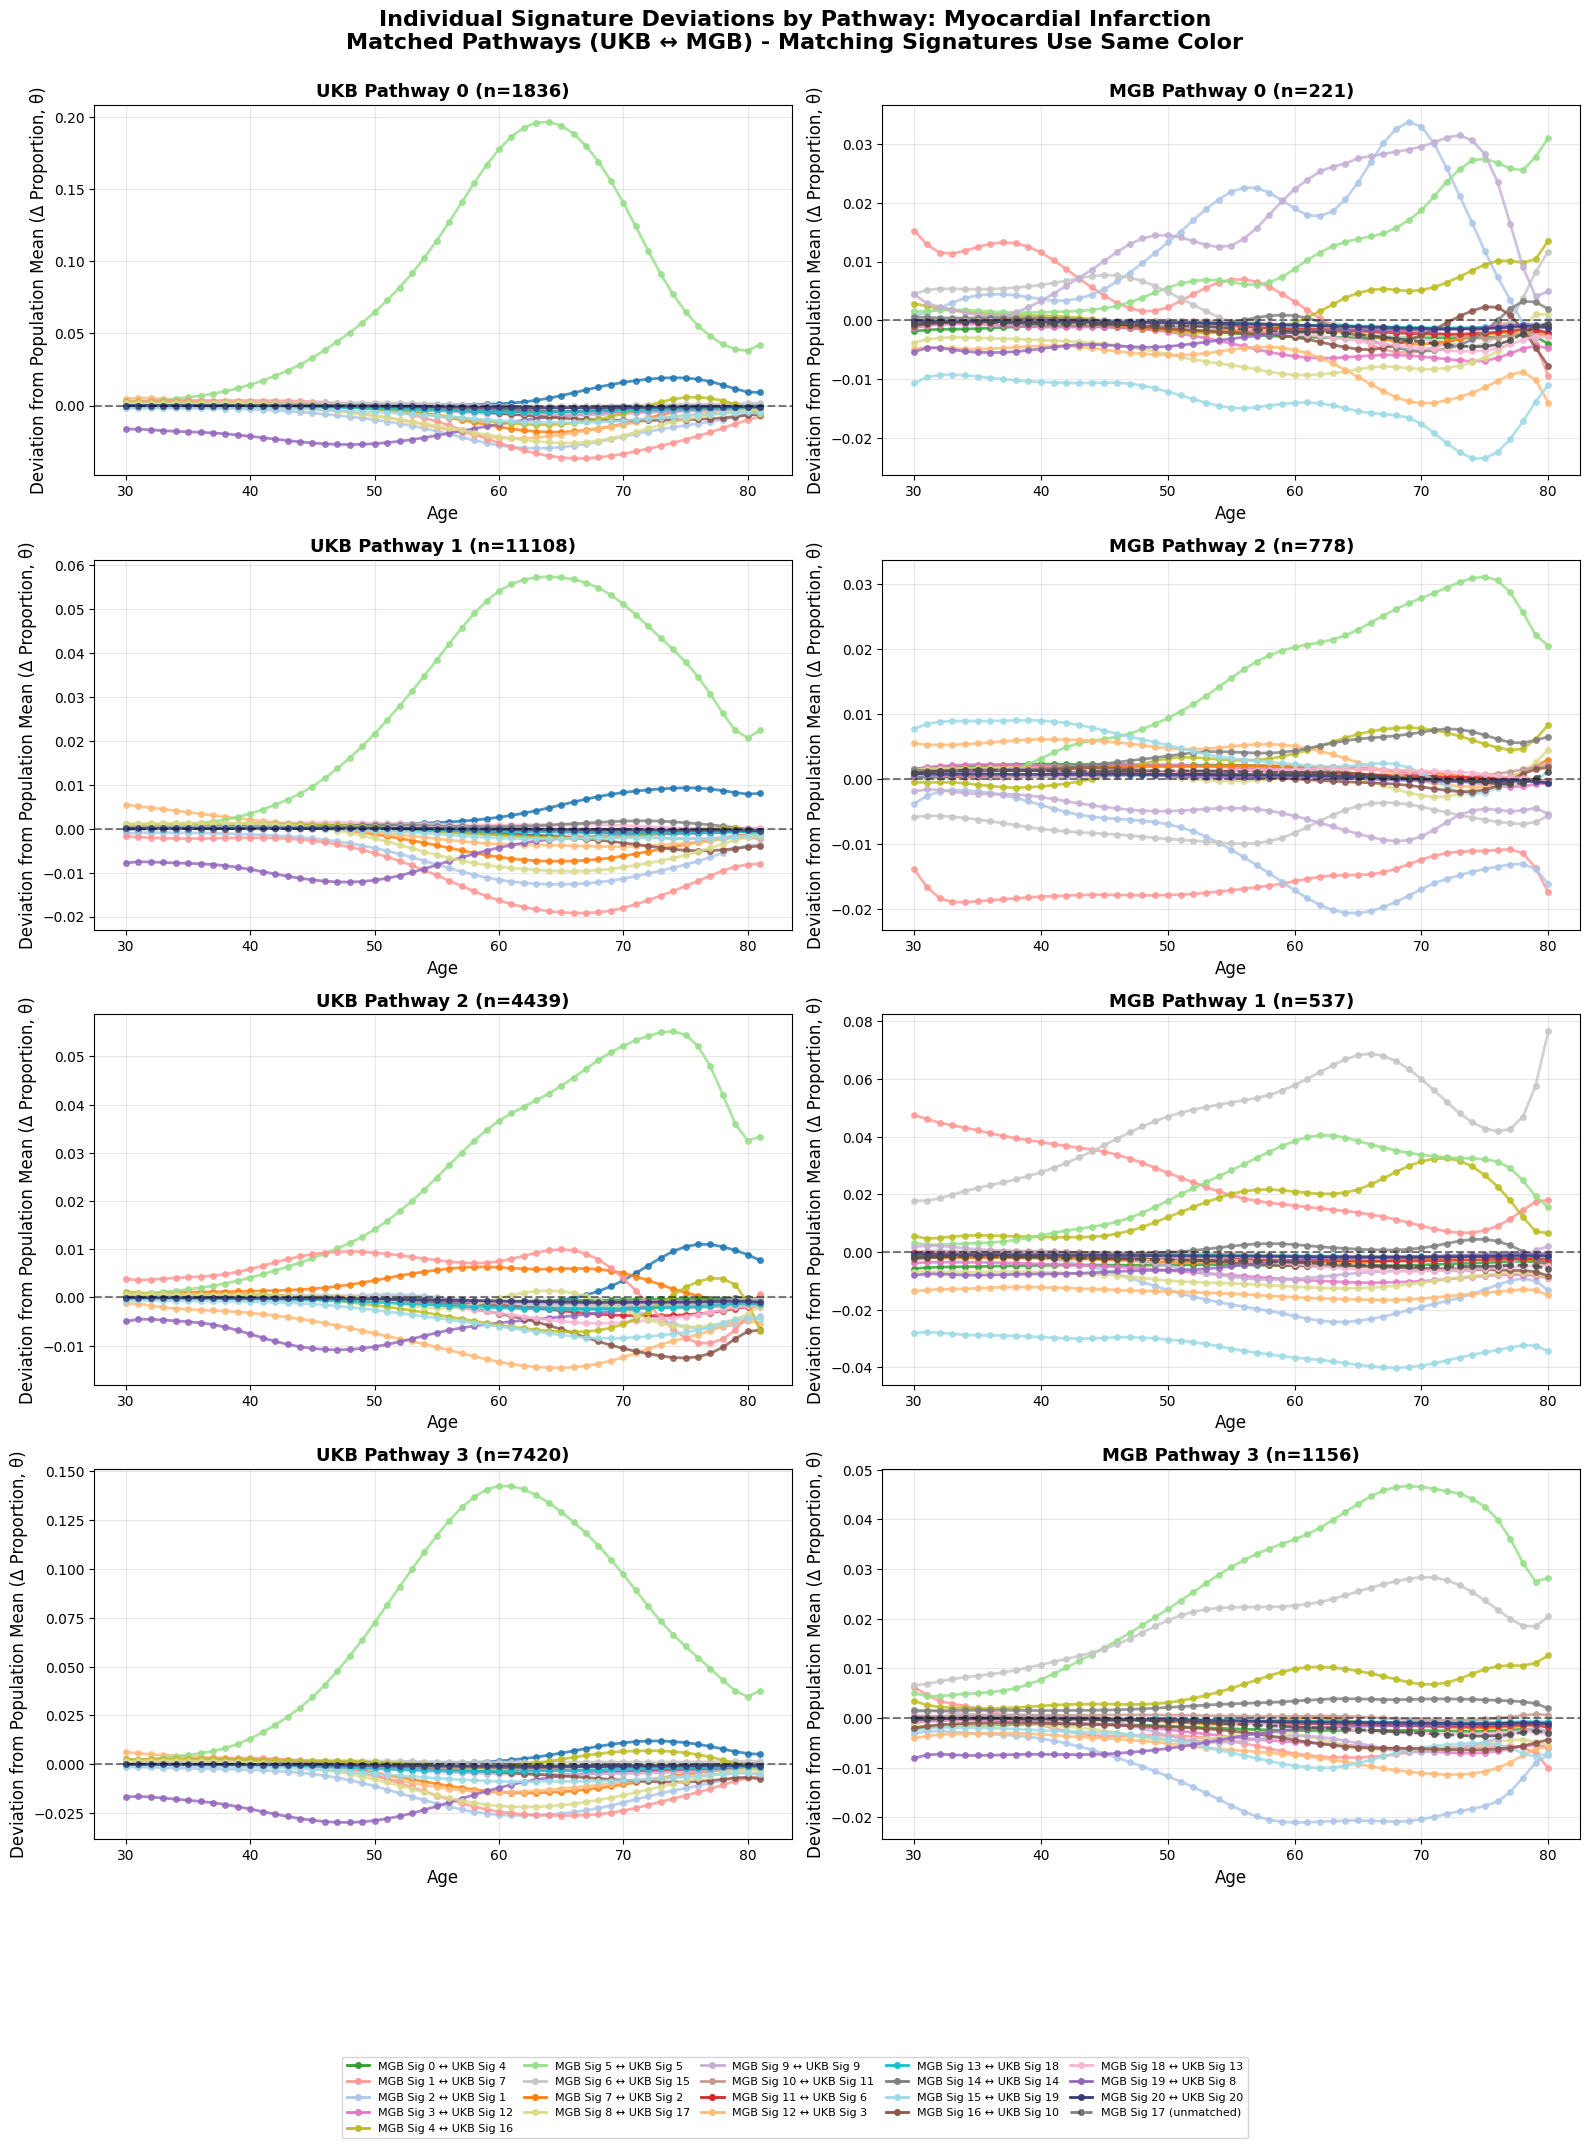


5. Creating signature deviation heatmaps...
   ✅ Heatmap saved to: signature_deviation_heatmaps_all_sigs_ukb_mgb.png


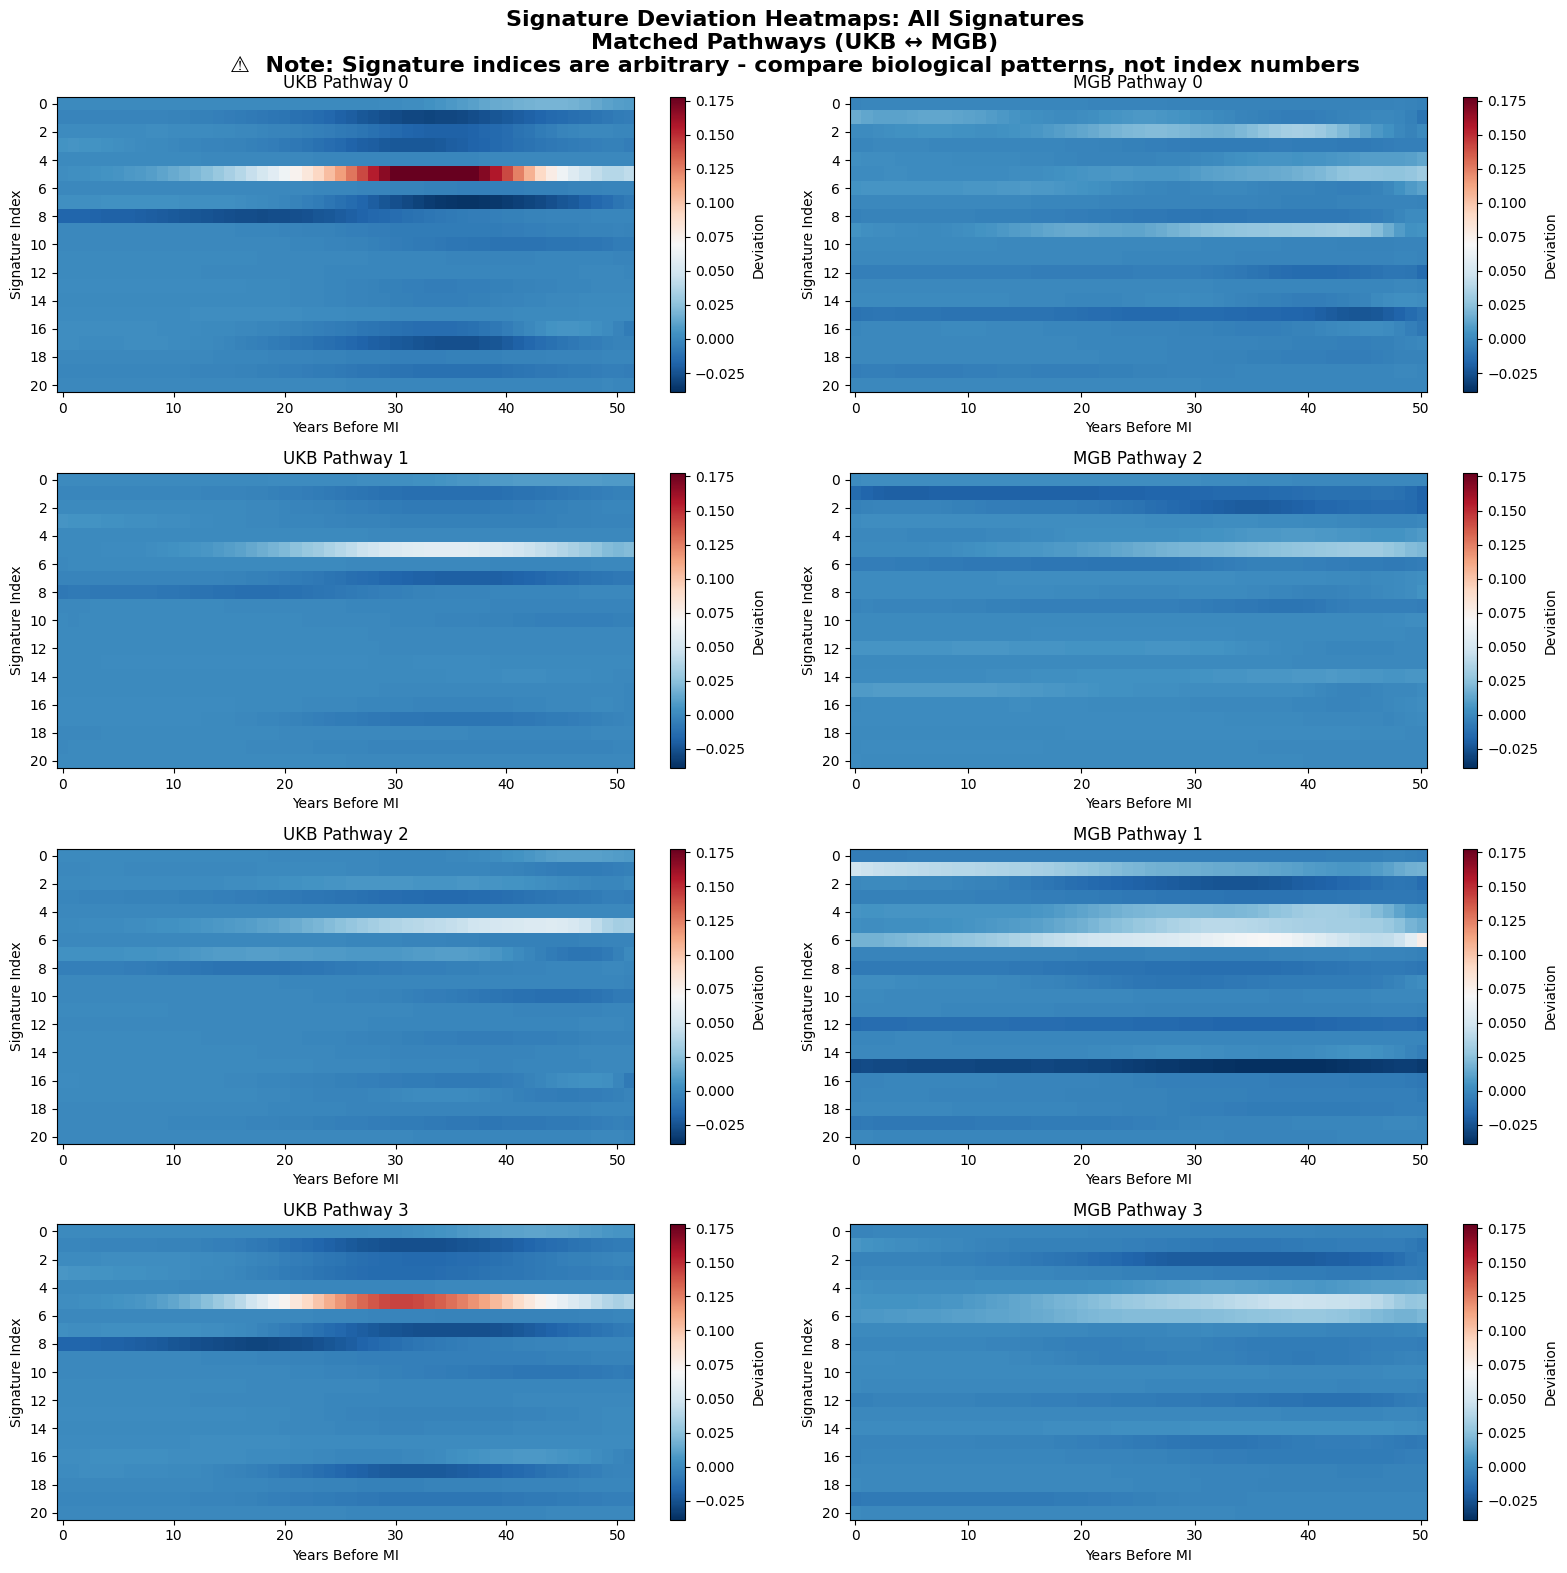


Step 4: Comparing PRS patterns (genetic validation)...

COMPARING PRS PATTERNS: STRONG REPRODUCIBILITY VALIDATION

1. Loading MGB PRS from model...
   ✅ MGB PRS shape: (34592, 36)

2. Loading UKB PRS...
   ⚠️  Could not load UKB PRS: [Errno 2] No such file or directory: '/Users/sarahurbut/aladynoulli2/pyScripts/prs_with_eid.csv'
   Skipping PRS comparison

✅ REPRODUCIBILITY ANALYSIS COMPLETE!

REPRODUCIBILITY SUMMARY:
--------------------------------------------------------------------------------
✅ 4 pathways matched between cohorts
✅ Disease pattern similarity: 0.704
✅ Proportion correlation: 0.702
✅ Age difference: 3.1 years

CONCLUSION: Deviation-based pathway discovery generalizes across cohorts!

✅ Reproducibility validation complete

✅ ALL ANALYSES COMPLETE!


In [6]:
# ============================================================================
# STEP 4: REPRODUCIBILITY VALIDATION
# ============================================================================
# Compare pathways discovered in UKB vs MGB cohorts

print("\n" + "="*80)
print("STEP 4: REPRODUCIBILITY VALIDATION")
print("="*80)

results['reproducibility'] = show_reproducibility(force_rerun_mgb=False)

print("\n✅ Reproducibility validation complete")

print("\n" + "="*80)
print("✅ ALL ANALYSES COMPLETE!")
print("="*80)


PATHWAY ANALYSIS VISUALIZATIONS

📊 Top Discriminating Signatures
   File: top_discriminating_signatures.pdf


### Top Discriminating Signatures

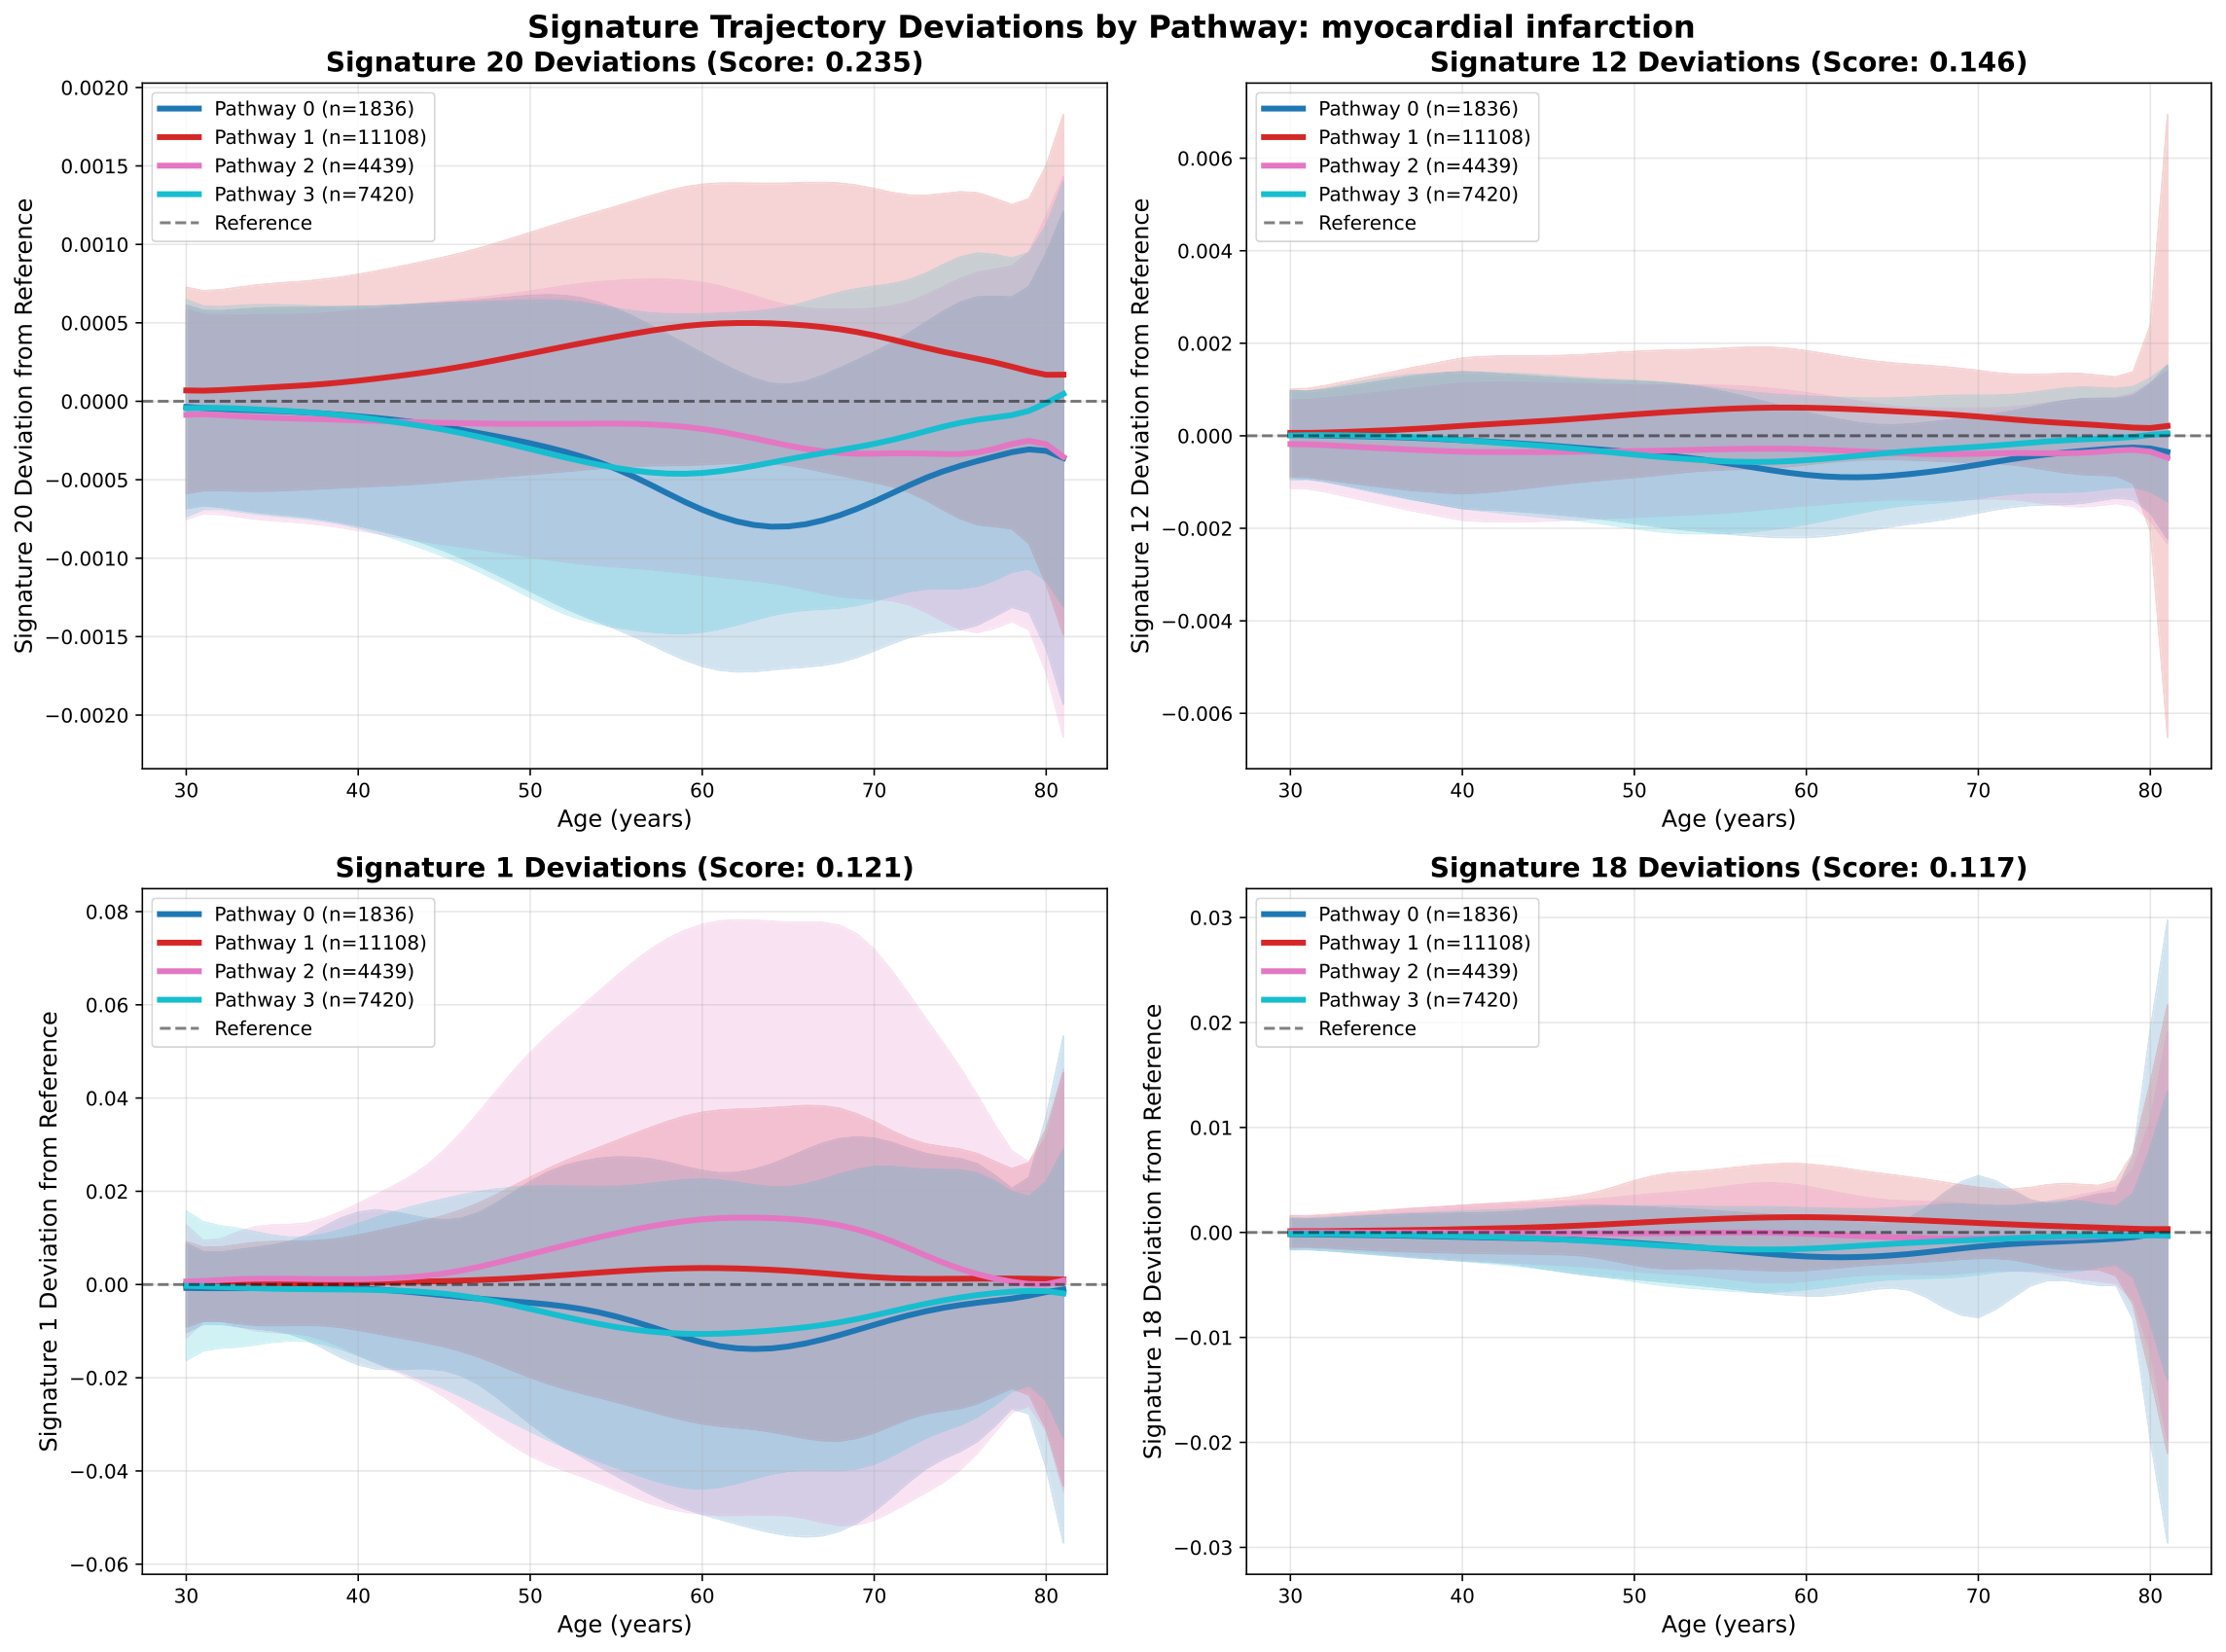


📊 Pathway Size and Age
   File: pathway_size_and_age.pdf


### Pathway Size and Age


📊 Signature Deviations by Pathway
   File: signature_deviations_by_pathway.pdf


### Signature Deviations by Pathway

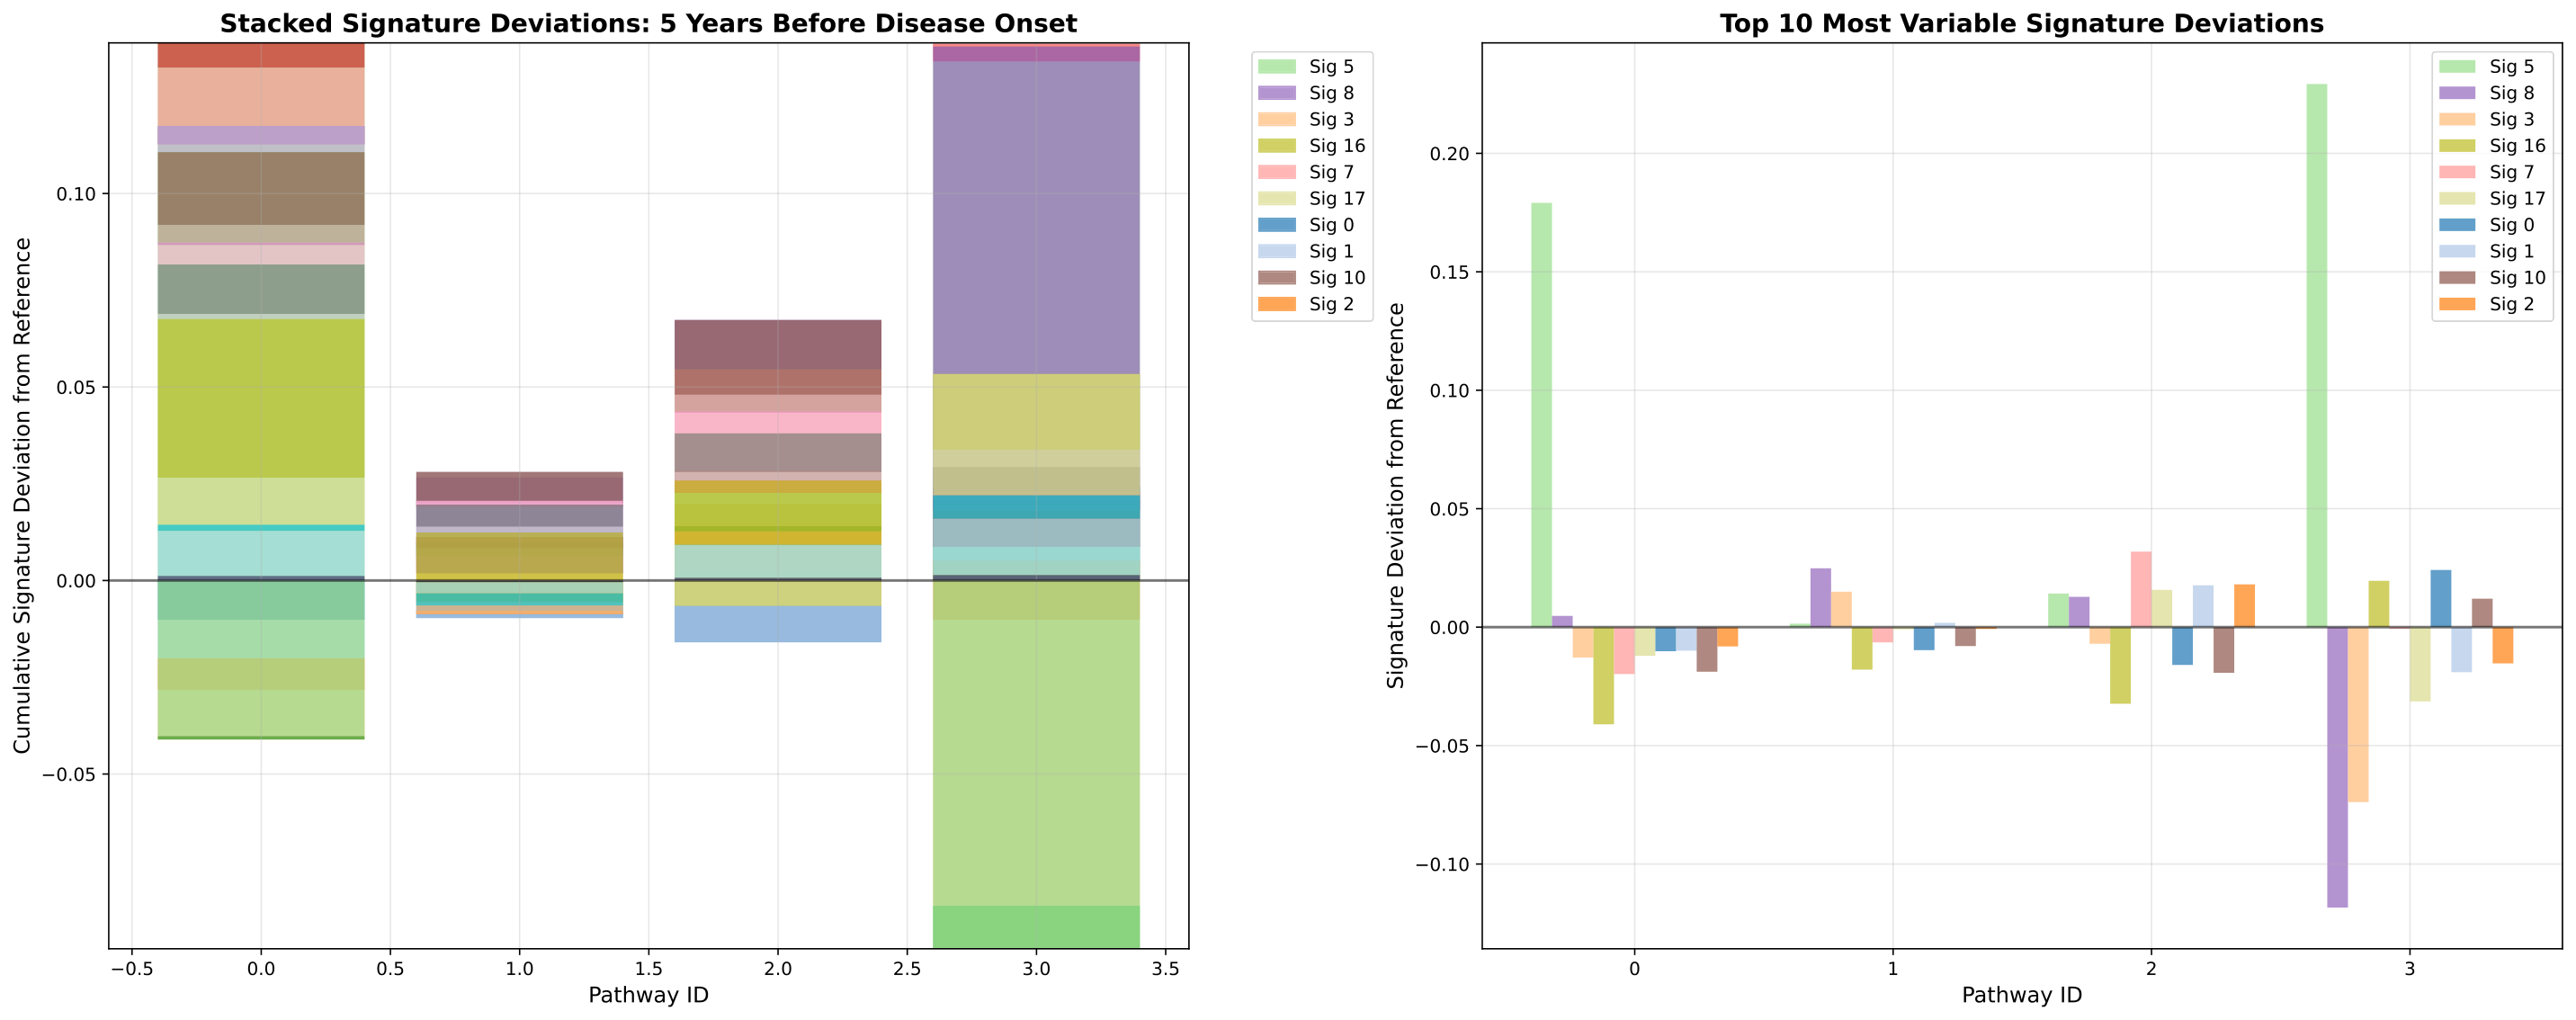


📊 Signature Deviations (Line Plot)
   File: signature_deviations_myocardial_infarction_10yr_line.pdf


### Signature Deviations (Line Plot)

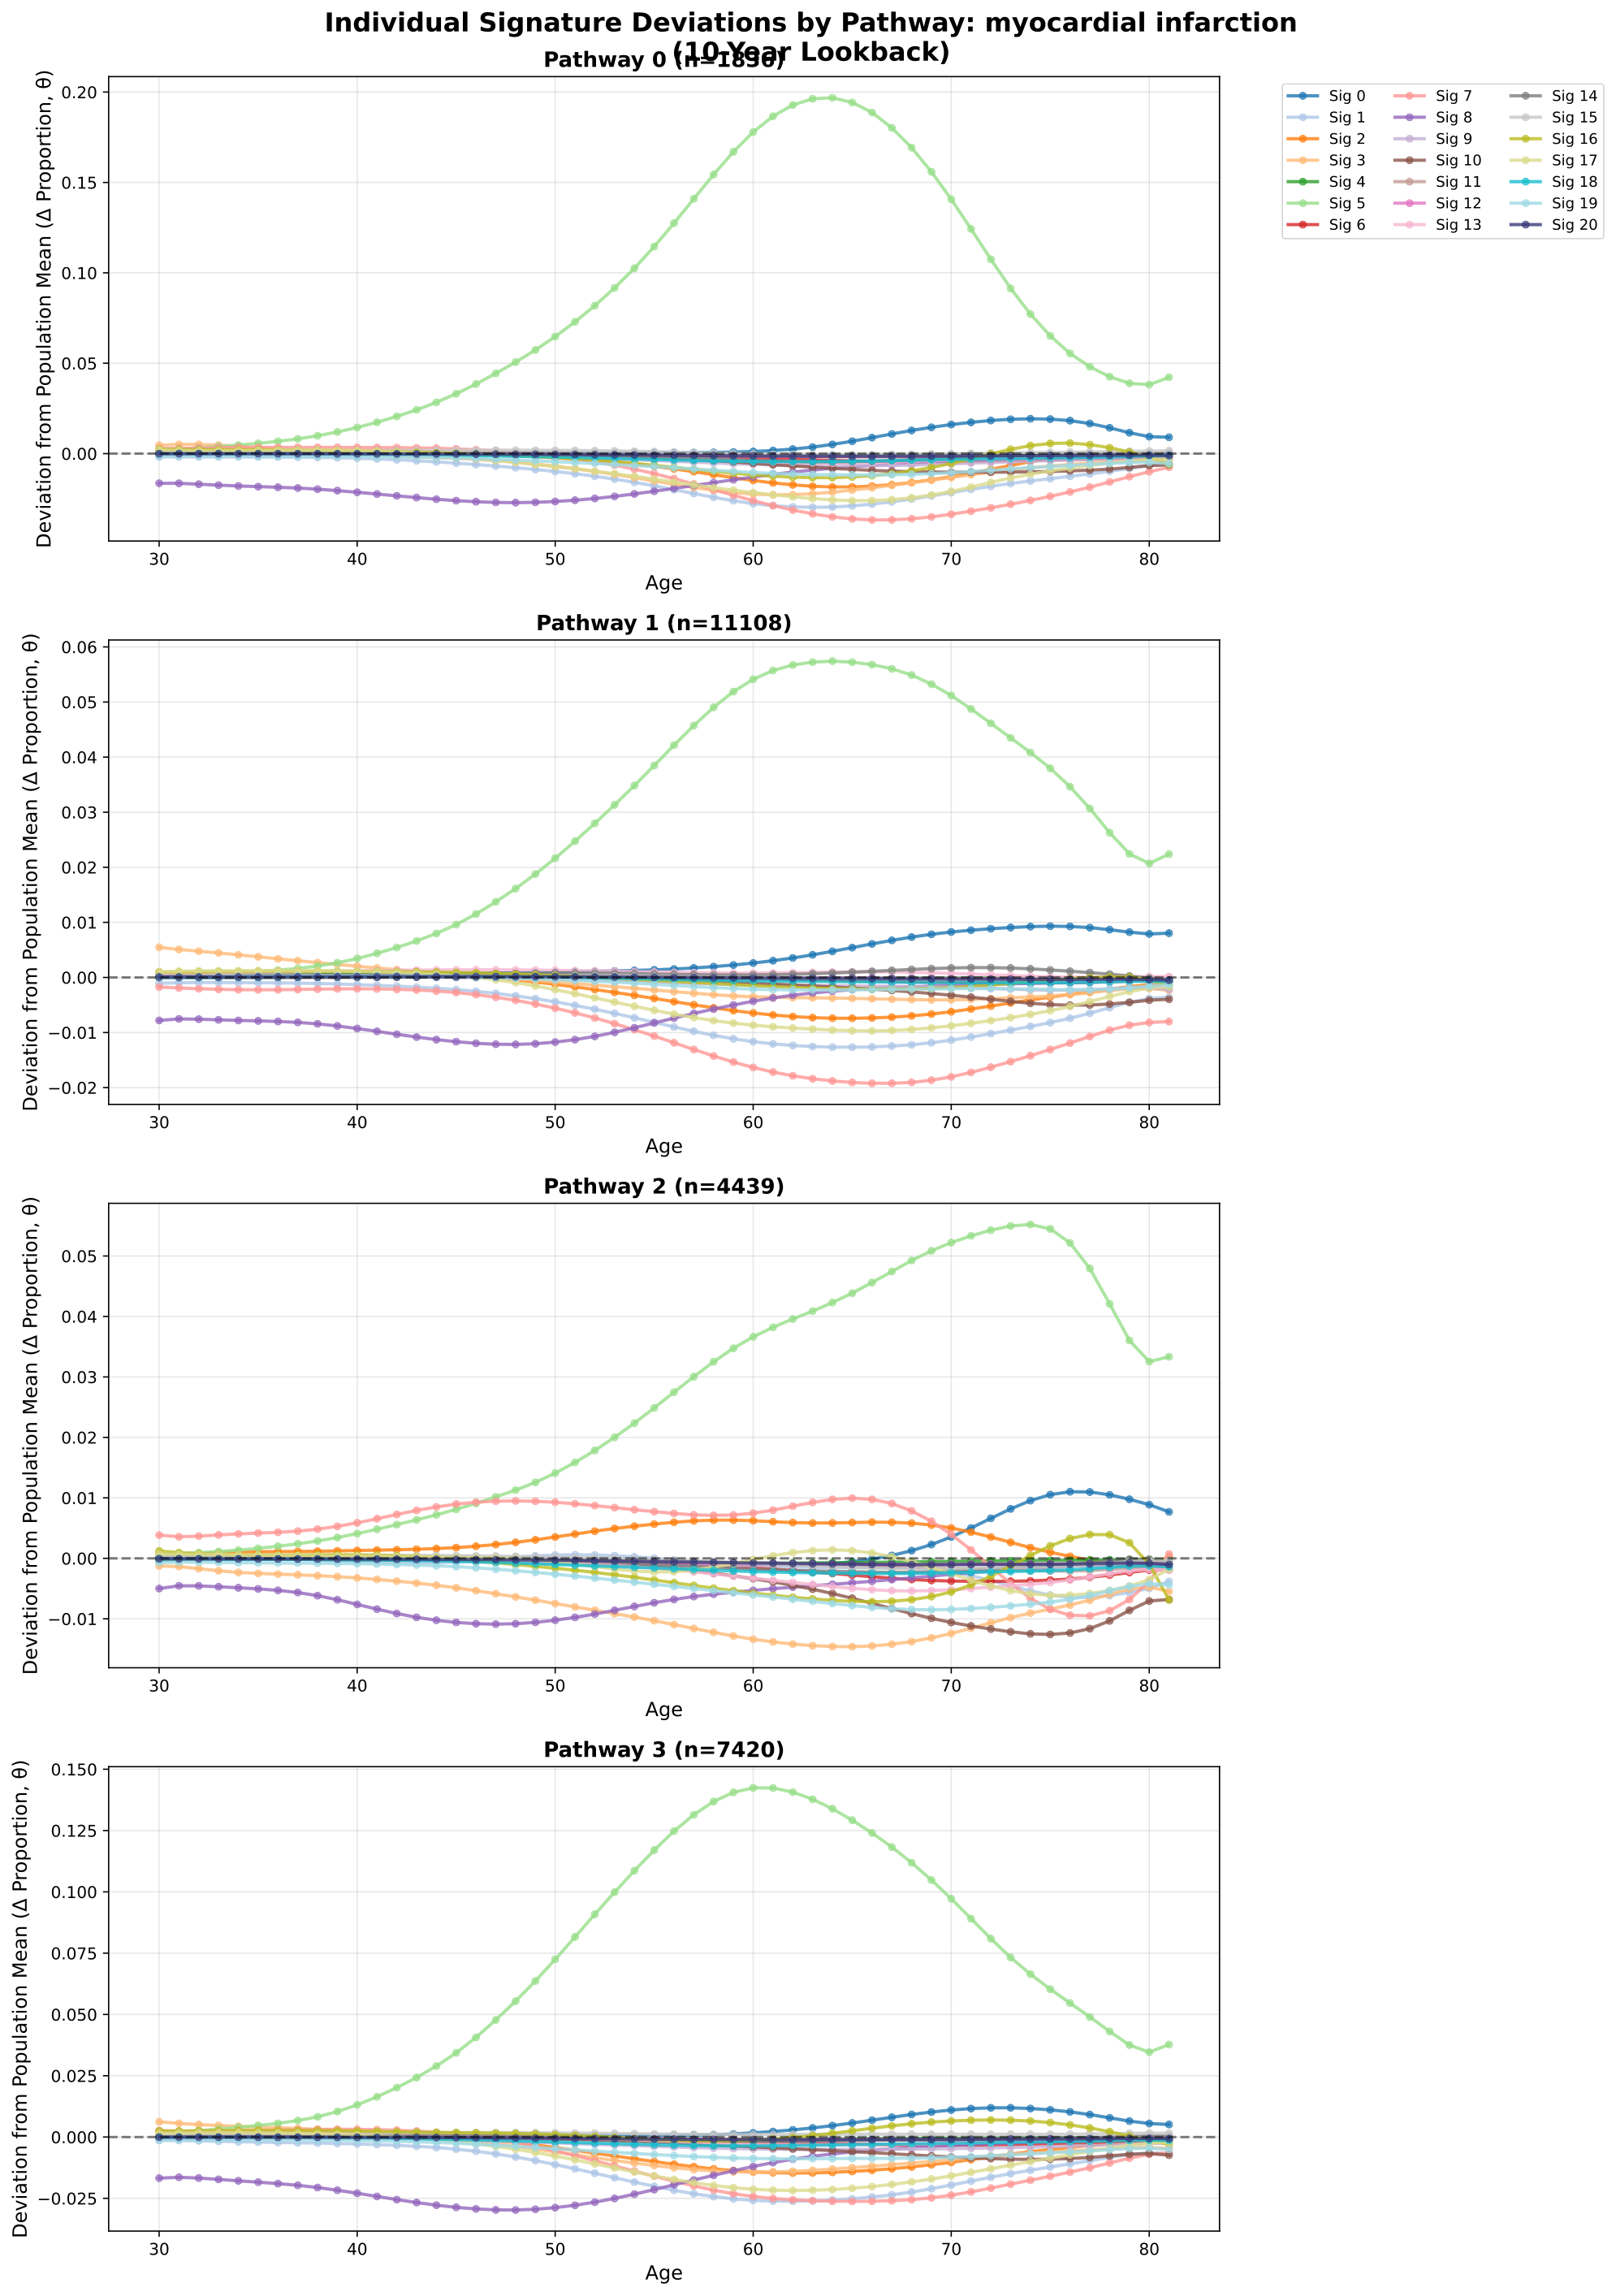


📊 Signature Deviations (Stacked)
   File: signature_deviations_myocardial_infarction_10yr_stacked.pdf


### Signature Deviations (Stacked)

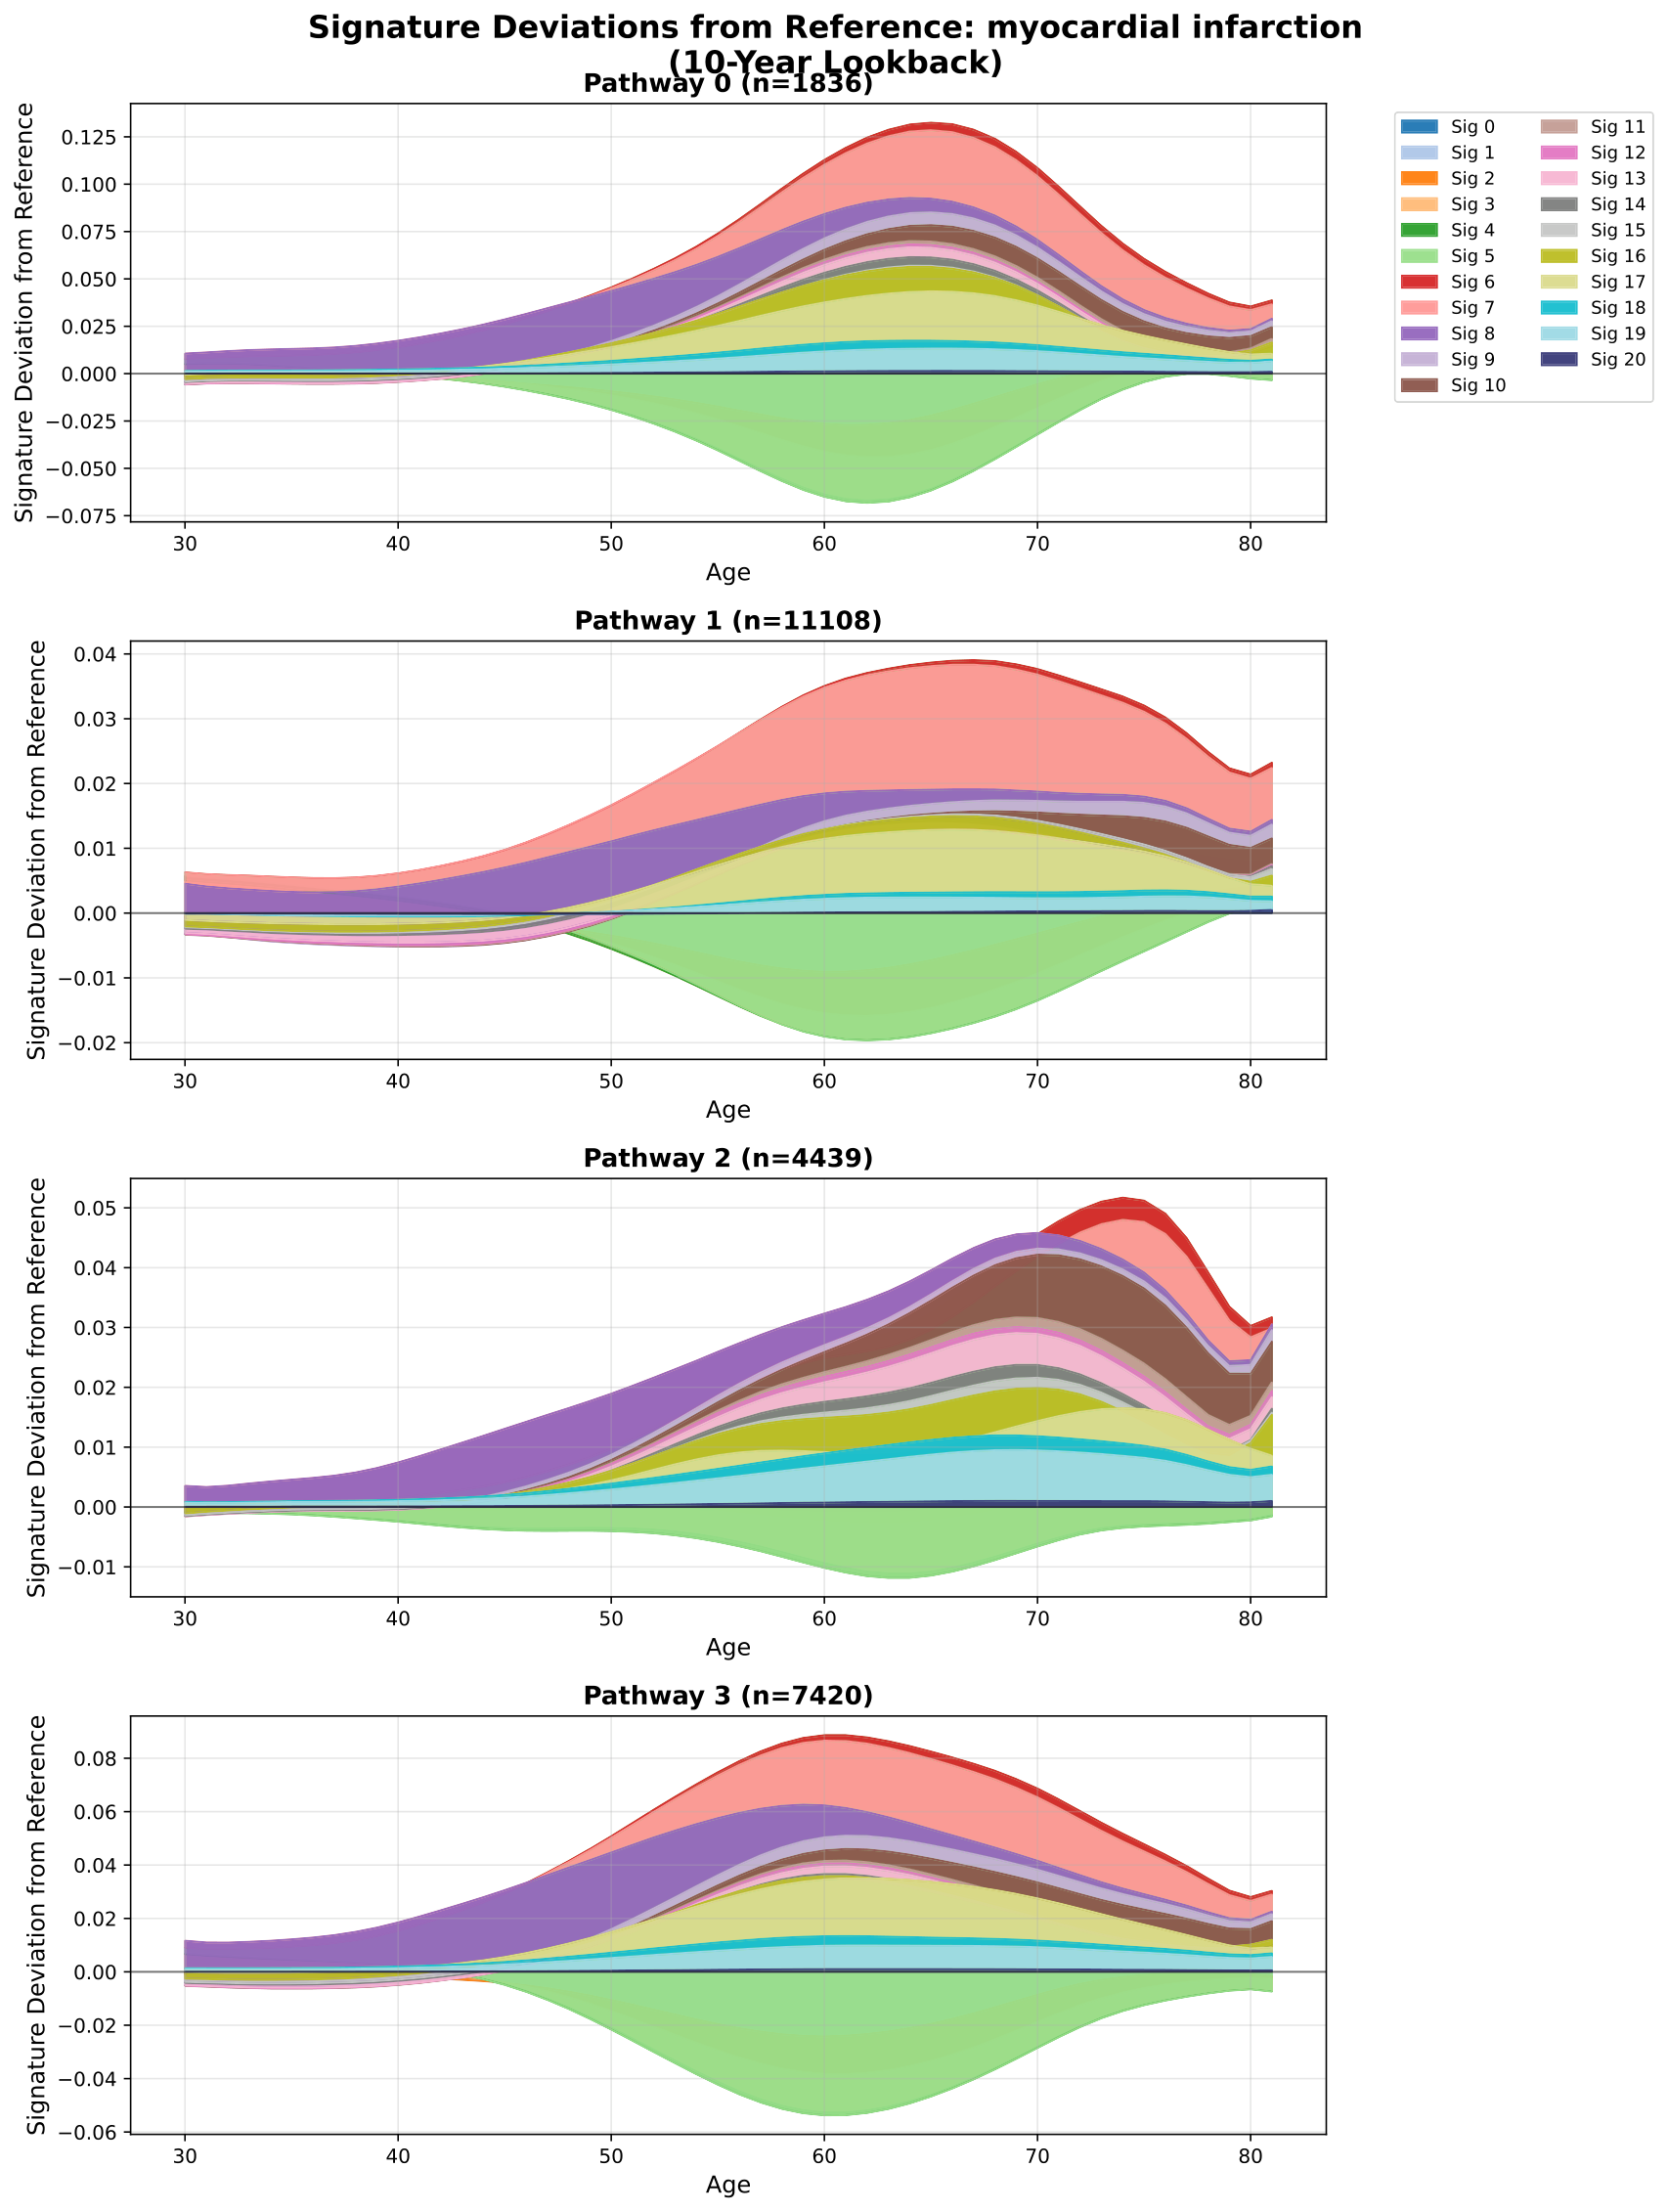


📊 PRS by Pathway
   File: prs_by_pathway.pdf


### PRS by Pathway

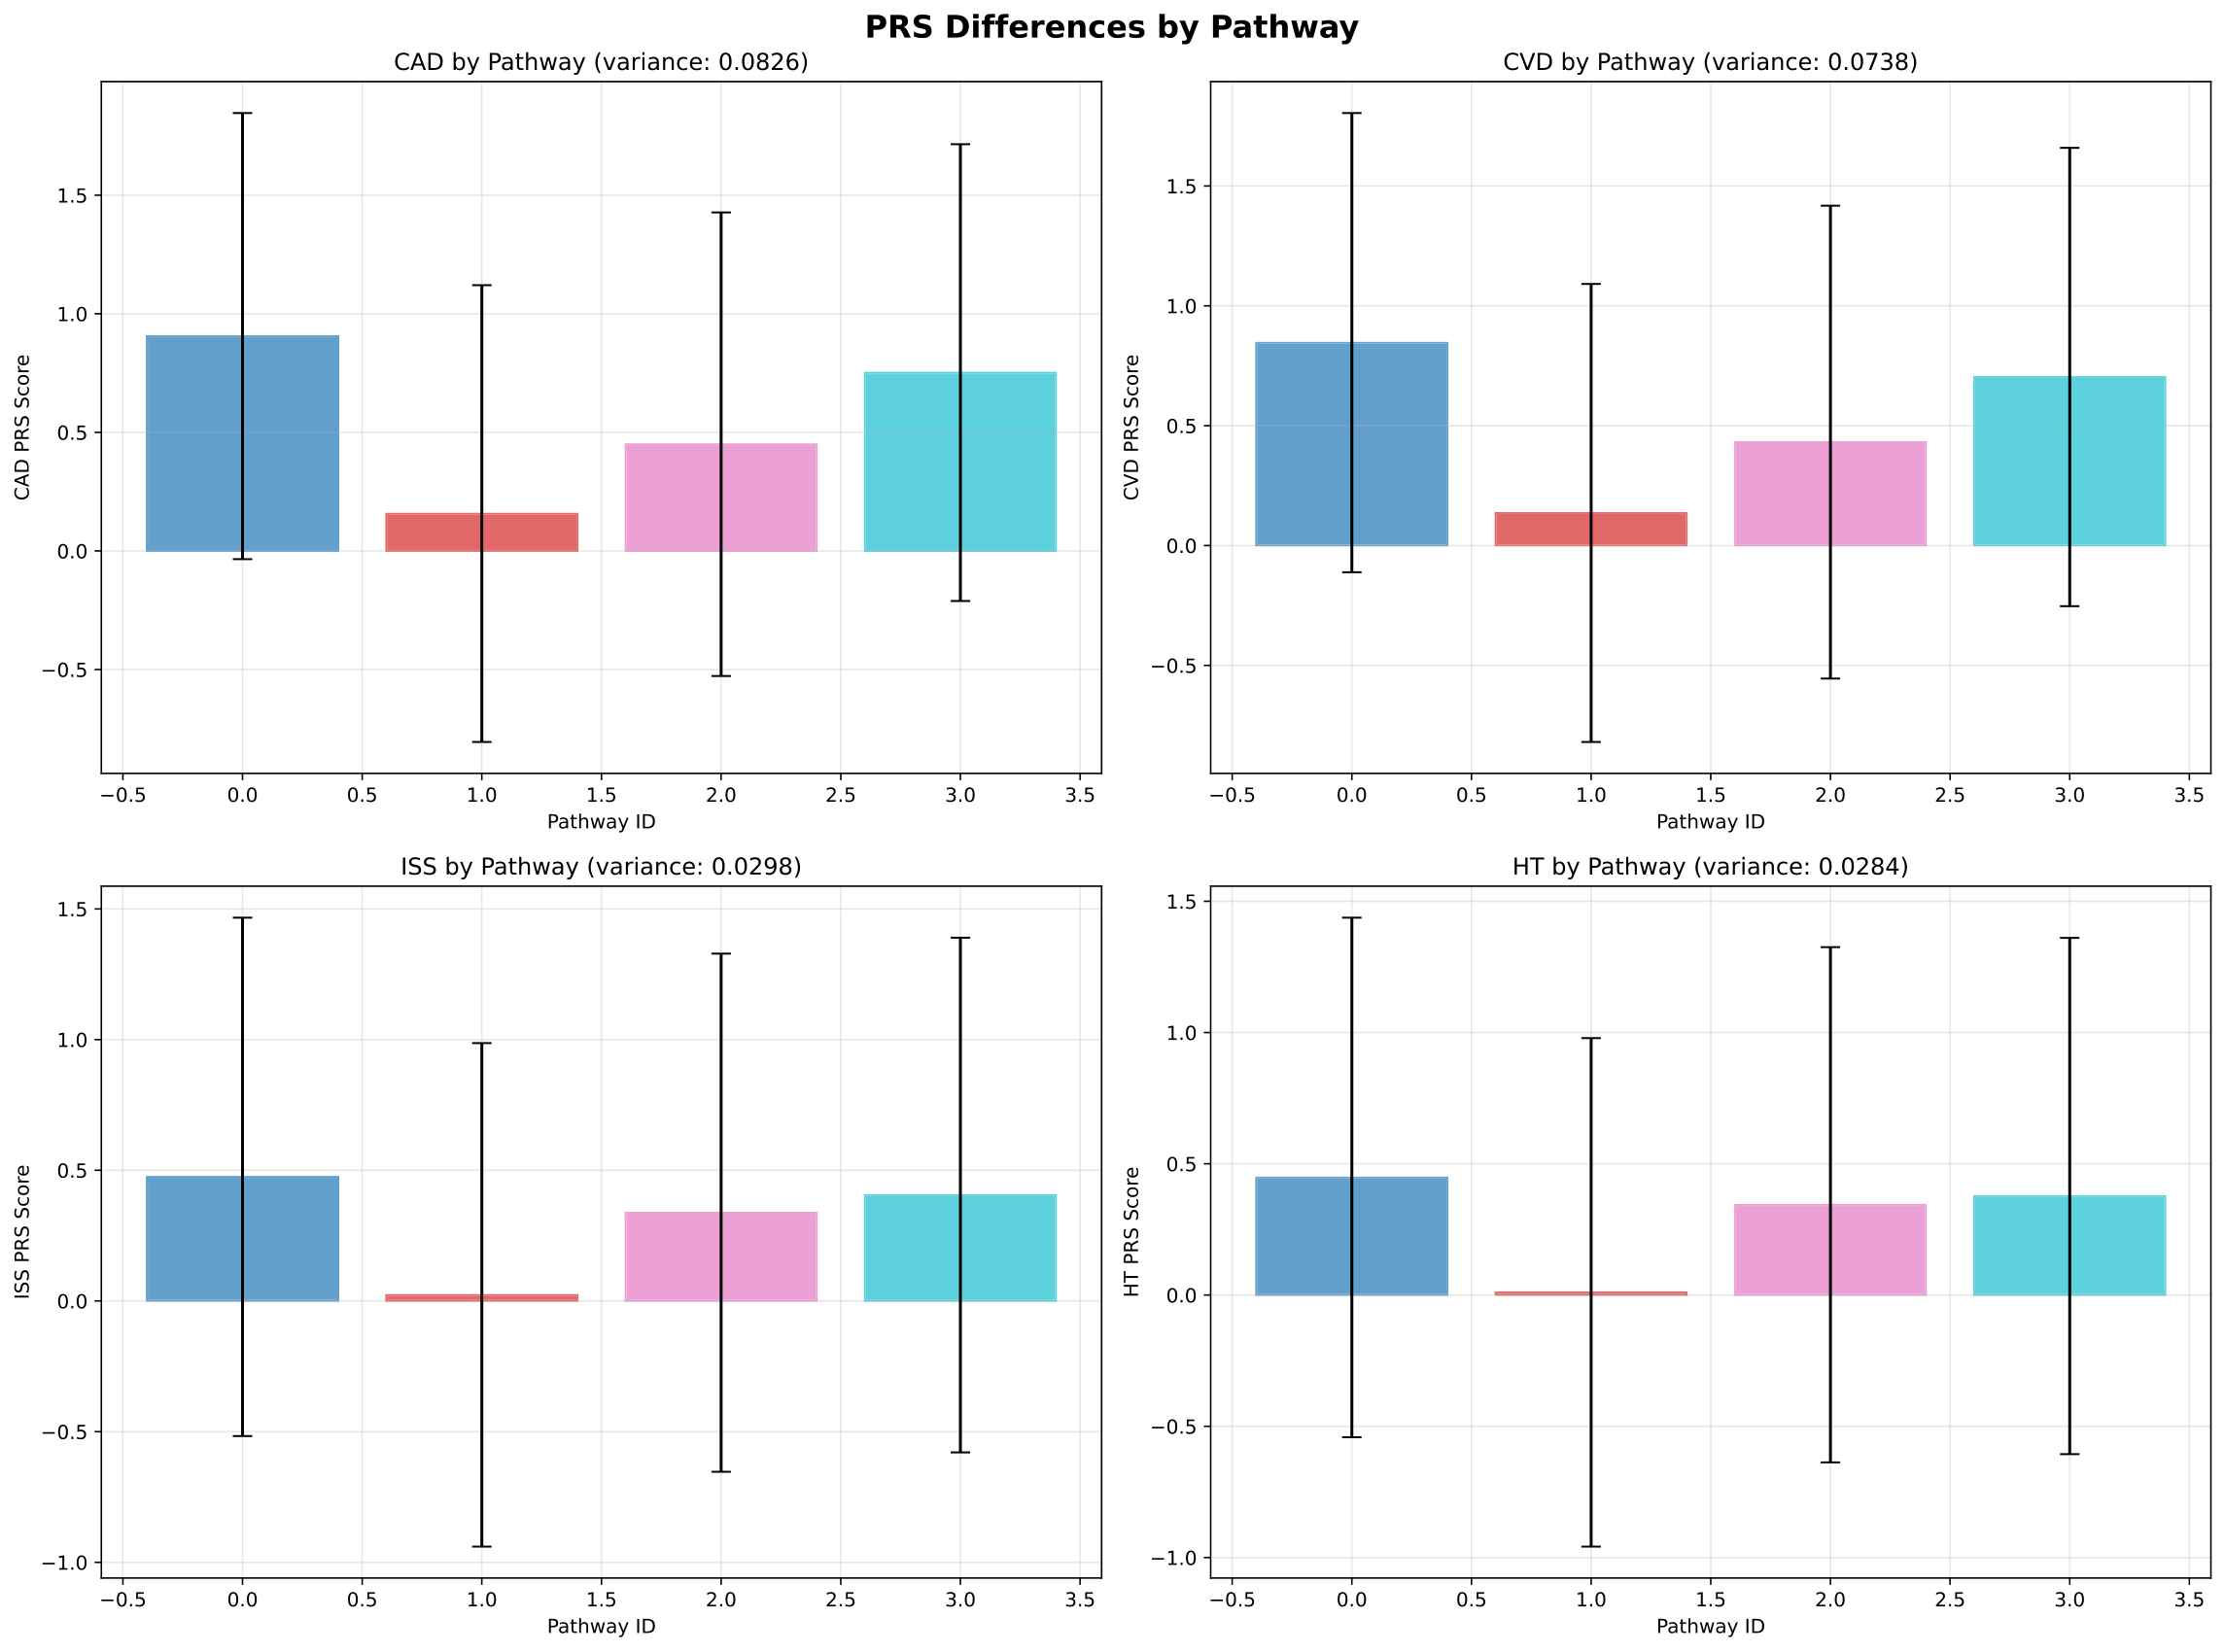


📊 Signature 5 Analysis
   File: signature5_analysis_myocardial_infarction.pdf


### Signature 5 Analysis

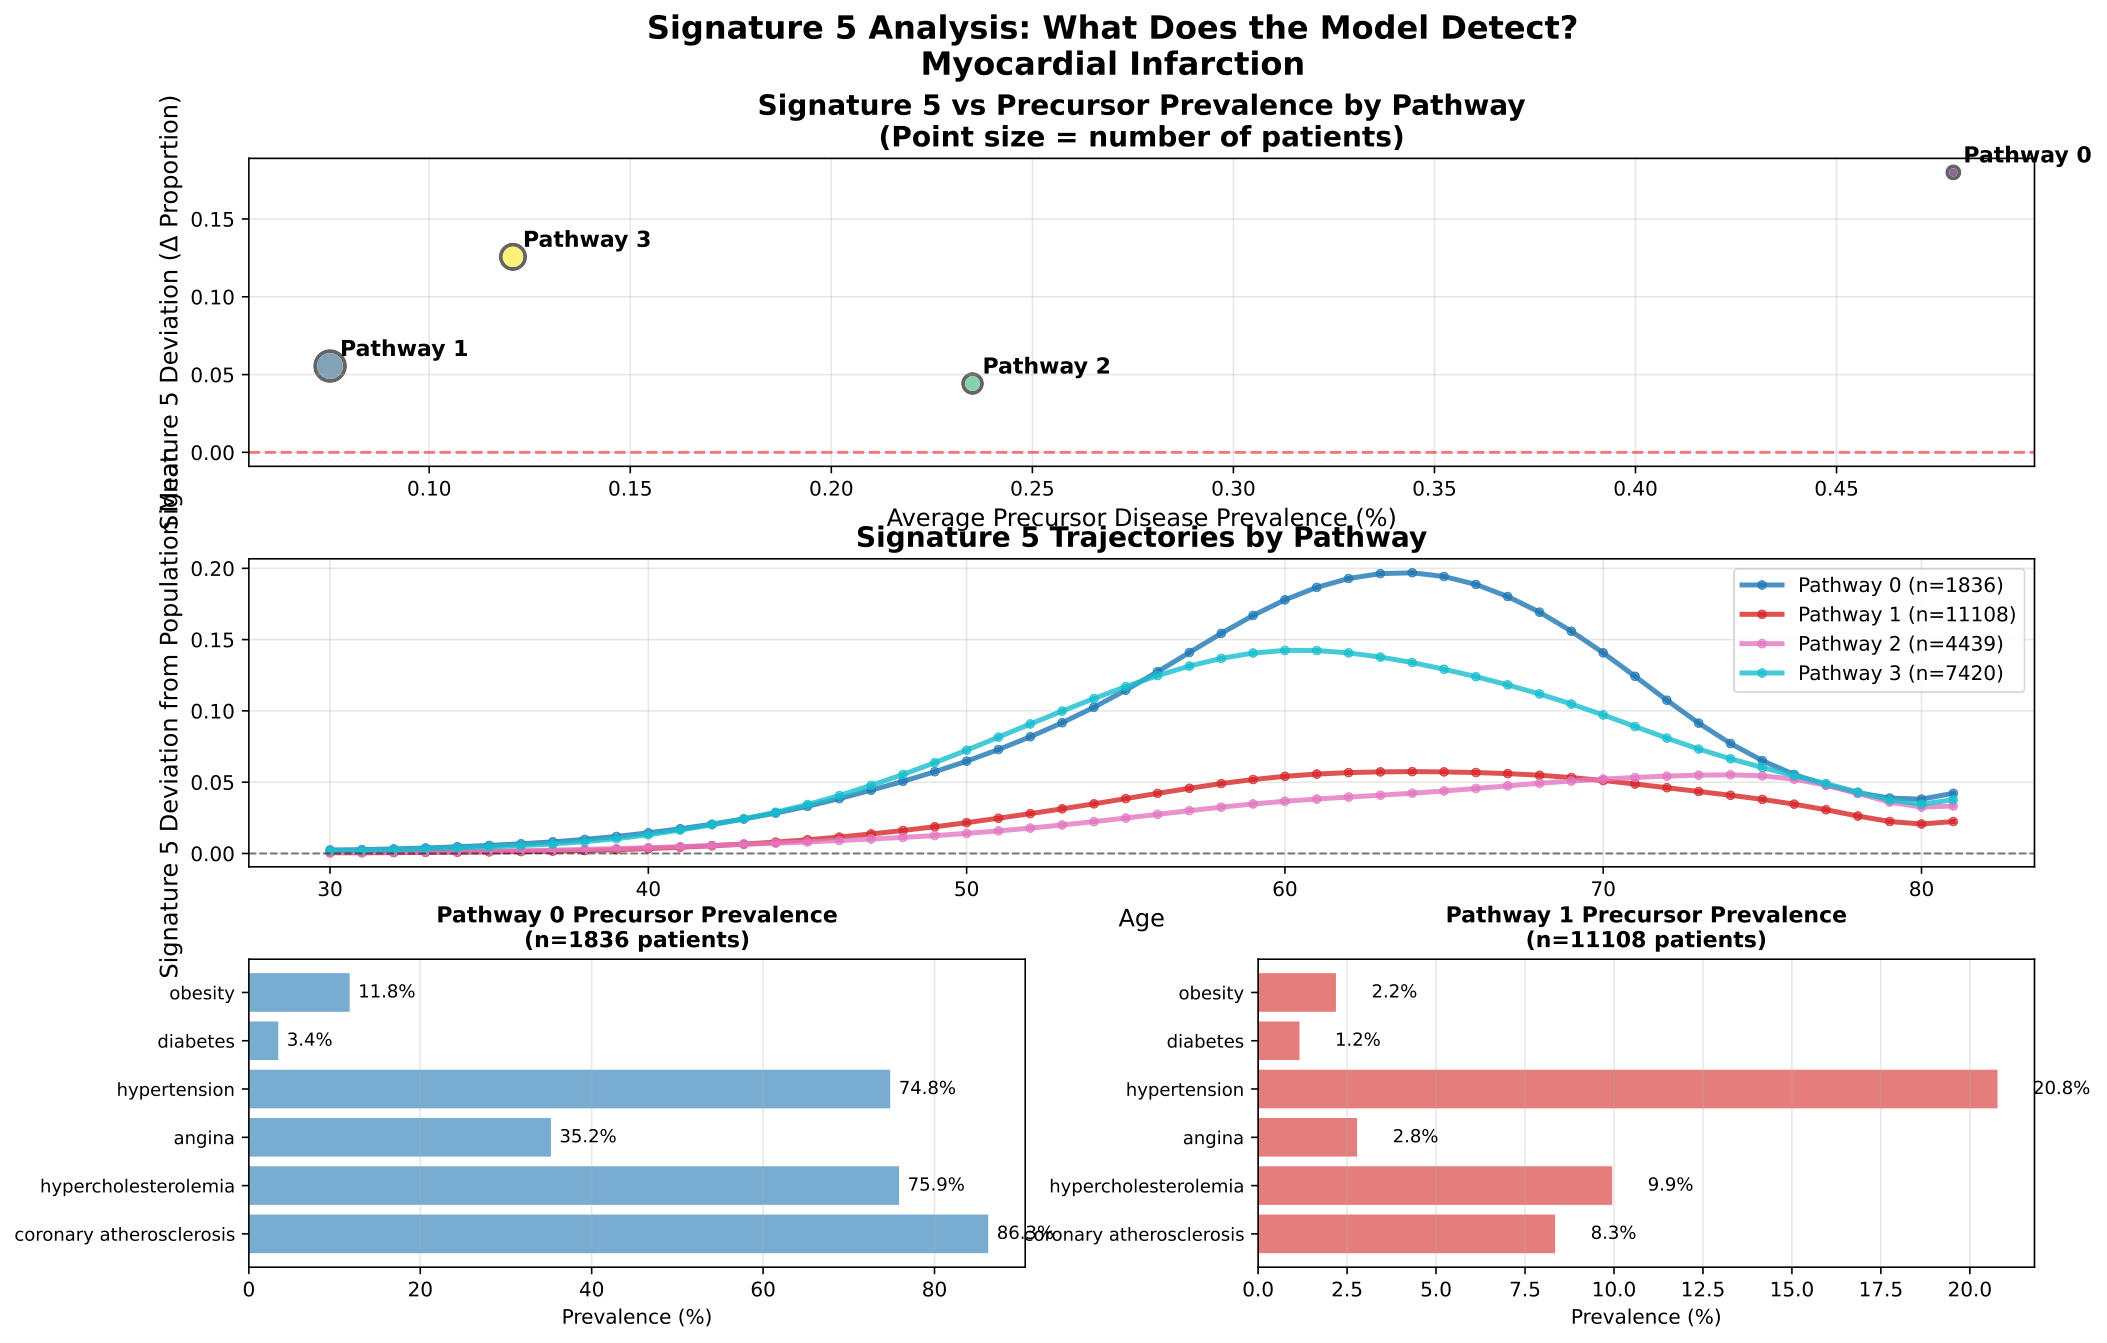


📊 FH Carrier Prevalence
   File: fh_carrier_prevalence_by_pathway_myocardial_infarction.pdf


### FH Carrier Prevalence

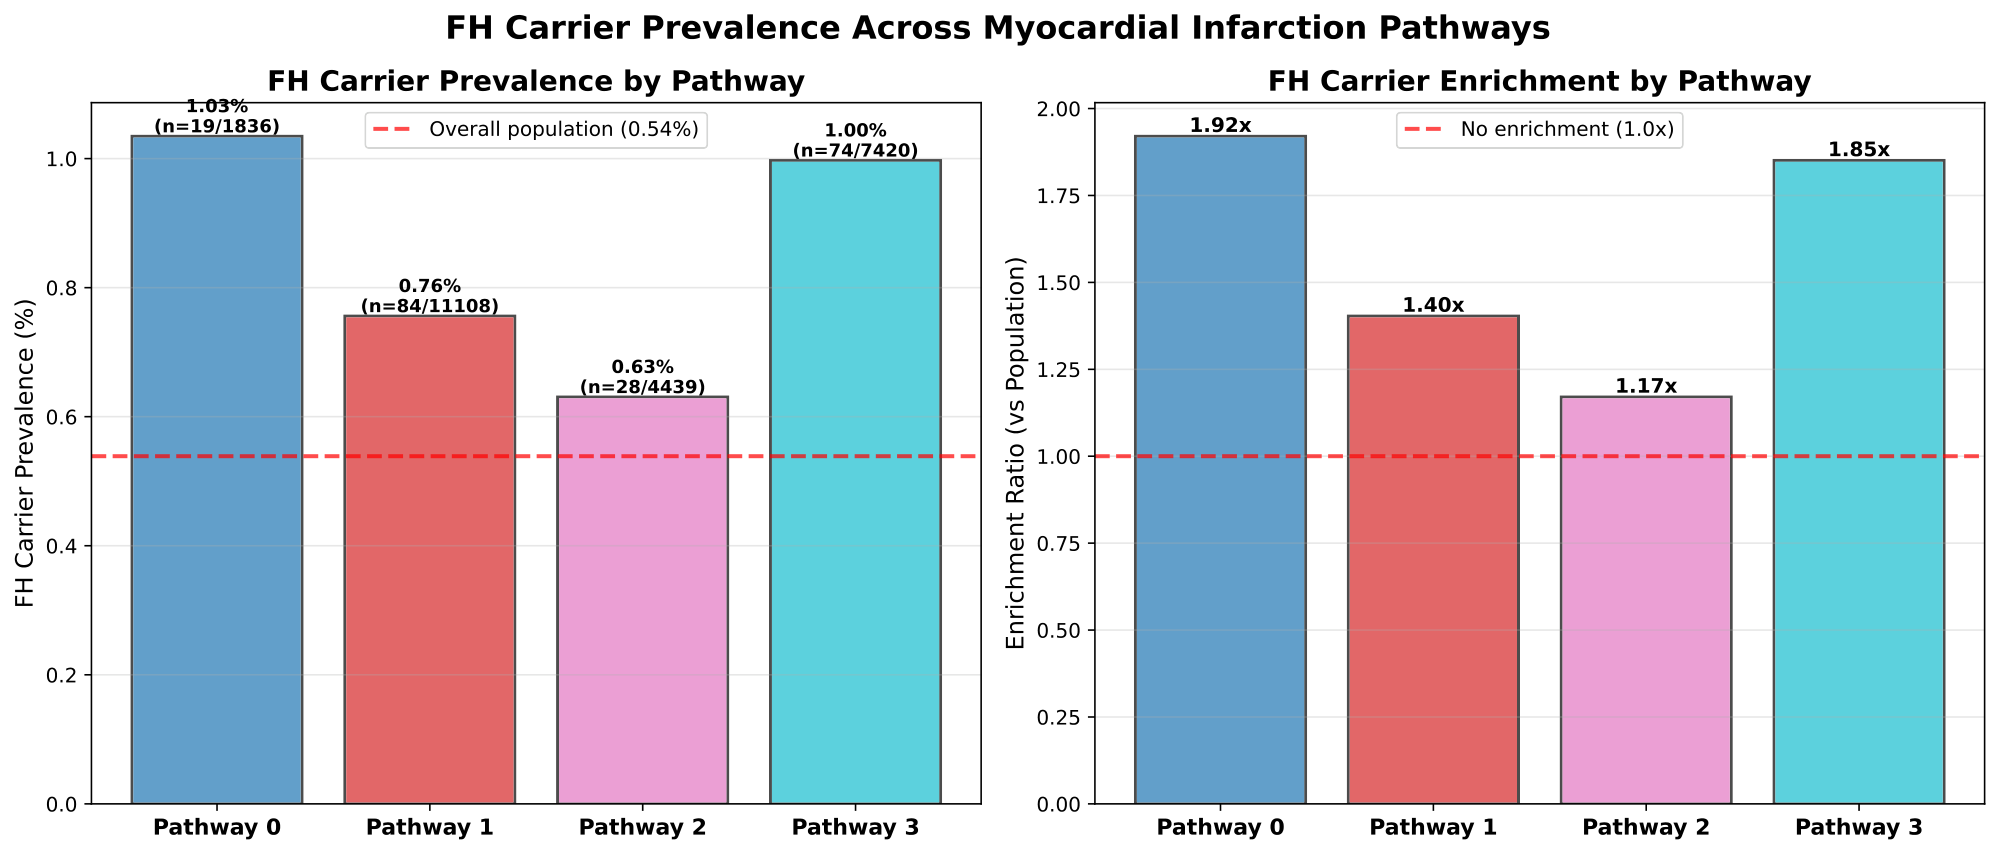


📊 Comprehensive Pathway Comparison
   File: comprehensive_pathway_comparison_myocardial_infarction.pdf


### Comprehensive Pathway Comparison

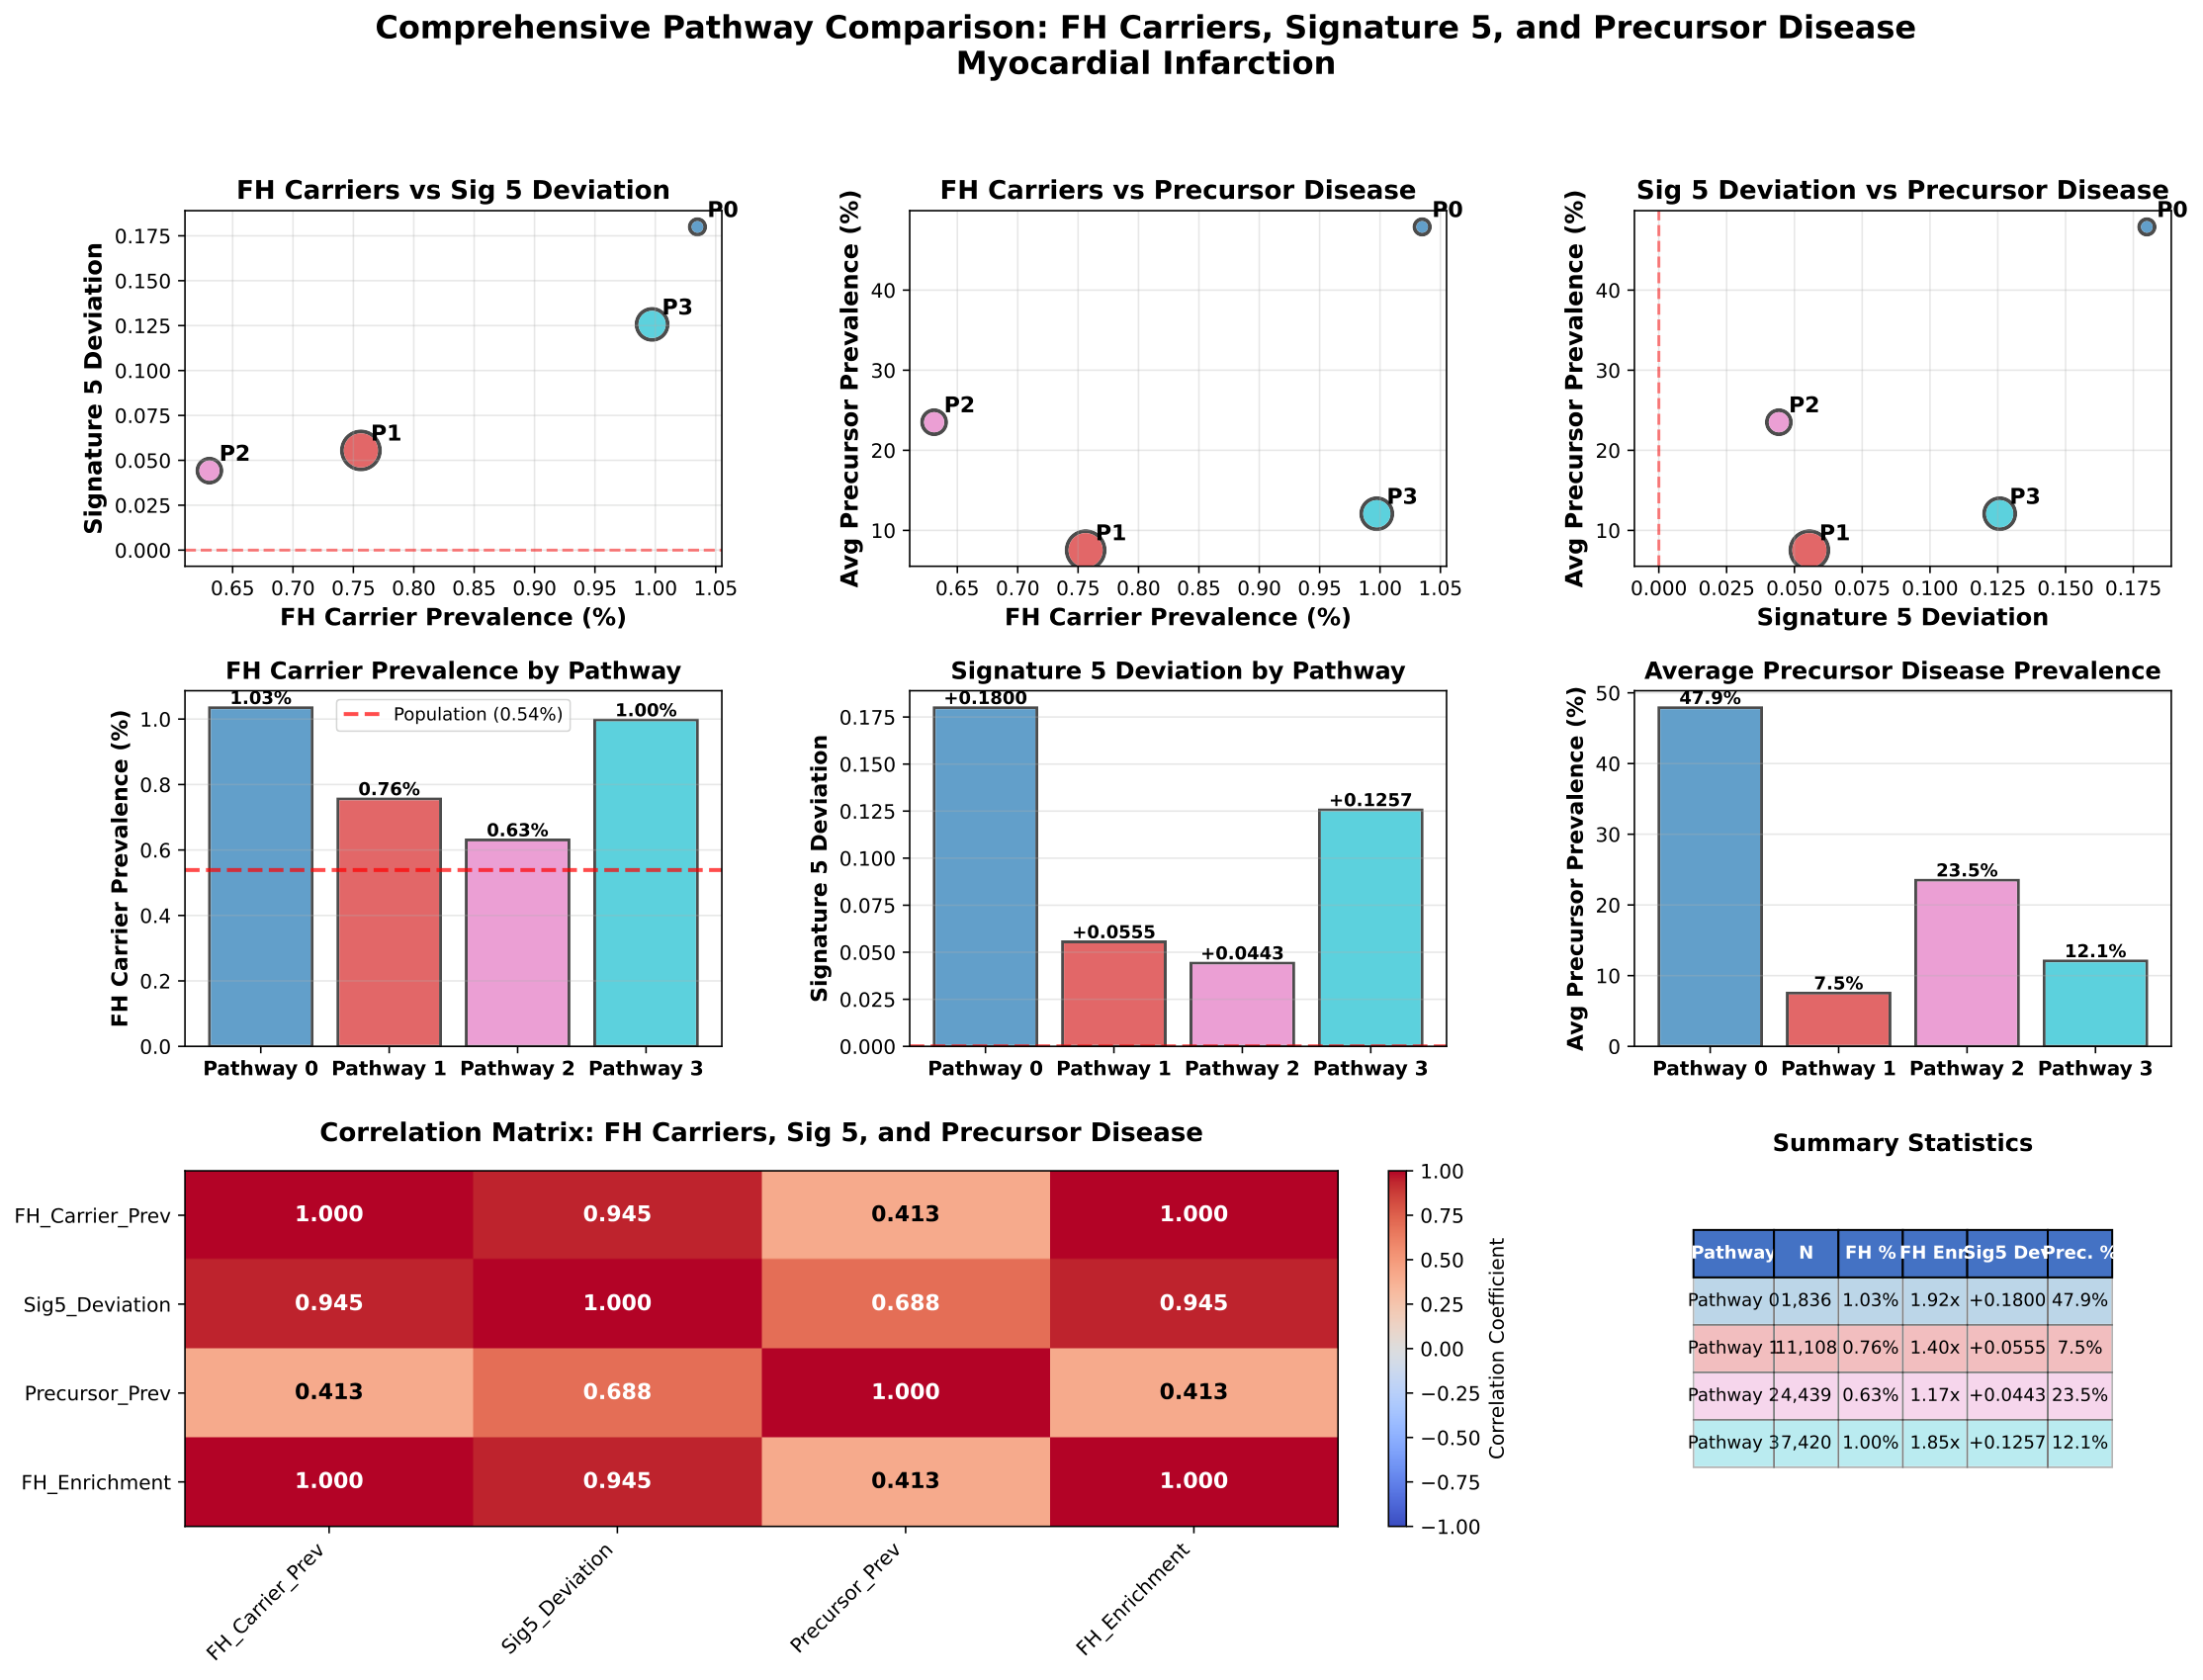


✅ Visualization display complete


In [15]:
# ============================================================================
# DISPLAY ALL PATHWAY VISUALIZATIONS
# ============================================================================

from IPython.display import Image, display, Markdown, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import pandas as pd
import os

# Try to import PDF conversion libraries
try:
    from pdf2image import convert_from_path
    HAS_PDF2IMAGE = True
except ImportError:
    HAS_PDF2IMAGE = False

try:
    import fitz  # PyMuPDF
    HAS_PYMUPDF = True
except ImportError:
    HAS_PYMUPDF = False

output_path = Path(output_dir) / 'ukb_pathway_discovery'

# List of all visualizations that should be generated
visualizations = {
    'Top Discriminating Signatures': 'top_discriminating_signatures.pdf',
    'Pathway Size and Age': 'pathway_size_and_age.pdf',
    'Signature Deviations by Pathway': 'signature_deviations_by_pathway.pdf',
    'Signature Deviations (Line Plot)': 'signature_deviations_myocardial_infarction_10yr_line.pdf',
    'Signature Deviations (Stacked)': 'signature_deviations_myocardial_infarction_10yr_stacked.pdf',
    'PRS by Pathway': 'prs_by_pathway.pdf',
    'Signature 5 Analysis': 'signature5_analysis_myocardial_infarction.pdf',
    'FH Carrier Prevalence': 'fh_carrier_prevalence_by_pathway_myocardial_infarction.pdf',
    'Comprehensive Pathway Comparison': 'comprehensive_pathway_comparison_myocardial_infarction.pdf'
}

print("="*80)
print("PATHWAY ANALYSIS VISUALIZATIONS")
print("="*80)

def display_pdf_as_image(pdf_path, title):
    """Convert PDF to image and display it."""
    abs_path = os.path.abspath(pdf_path)
    
    # Try PyMuPDF first (faster)
    if HAS_PYMUPDF:
        try:
            doc = fitz.open(pdf_path)
            page = doc[0]  # First page
            pix = page.get_pixmap(matrix=fitz.Matrix(2, 2))  # 2x zoom for better quality
            img_data = pix.tobytes("png")
            doc.close()
            display(Image(img_data))
            return True
        except Exception as e:
            pass
    
    # Try pdf2image
    if HAS_PDF2IMAGE:
        try:
            images = convert_from_path(pdf_path, dpi=150, first_page=1, last_page=1)
            if images:
                # Convert PIL image to bytes
                from io import BytesIO
                buf = BytesIO()
                images[0].save(buf, format='PNG')
                buf.seek(0)
                display(Image(buf.getvalue()))
                return True
        except Exception as e:
            pass
    
    # Fallback: show link
    display(HTML(f'''
        <div style="margin: 10px 0; padding: 10px; border: 1px solid #ccc; background: #f5f5f5;">
            <p><strong>{title}</strong></p>
            <p>PDF file: <code>{pdf_path.name}</code></p>
            <p><a href="file://{abs_path}" target="_blank" style="color: #0066cc;">📄 Click here to open PDF in new tab</a></p>
        </div>
    '''))
    return False

# Display each visualization
for title, filename in visualizations.items():
    fig_path = output_path / filename
    
    if fig_path.exists():
        print(f"\n📊 {title}")
        print(f"   File: {filename}")
        
        # Display title
        display(Markdown(f"### {title}"))
        
        # Try to display as image
        display_pdf_as_image(fig_path, title)
        
    else:
        print(f"\n⚠️  {title}: {filename} (not found)")

print("\n" + "="*80)
print("✅ Visualization display complete")
if not HAS_PDF2IMAGE and not HAS_PYMUPDF:
    print("💡 Tip: Install 'PyMuPDF' (pip install pymupdf) or 'pdf2image' for better PDF display")
print("="*80)


In [8]:
# ============================================================================
# DISPLAY SUMMARY STATISTICS AND DATA TABLES
# ============================================================================

output_path = Path(output_dir) / 'ukb_pathway_discovery'

# Check for summary file
summary_file = output_path / 'analysis_summary.txt'
if summary_file.exists():
    print("="*80)
    print("ANALYSIS SUMMARY")
    print("="*80)
    with open(summary_file, 'r') as f:
        print(f.read())

# Check for disease prevalence
prevalence_file = output_path / 'disease_prevalence_tests.csv'
if prevalence_file.exists():
    print("\n" + "="*80)
    print("DISEASE PREVALENCE BY PATHWAY")
    print("="*80)
    prevalence_df = pd.read_csv(prevalence_file)
    print(f"\nLoaded {len(prevalence_df)} disease-pathway comparisons")
    display(prevalence_df.head(20))

# Load signature discrimination table
sig_disc_file = output_path / 'signature_discrimination_table.csv'
if sig_disc_file.exists():
    print("\n" + "="*80)
    print("SIGNATURE DISCRIMINATION")
    print("="*80)
    sig_disc_df = pd.read_csv(sig_disc_file)
    display(sig_disc_df)

# Load top diseases table
top_diseases_file = output_path / 'top_20_diseases_table.csv'
if top_diseases_file.exists():
    print("\n" + "="*80)
    print("TOP DISEASES BY PATHWAY")
    print("="*80)
    top_diseases_df = pd.read_csv(top_diseases_file)
    display(top_diseases_df)

# Load effect sizes if available (as PNG)
effect_sizes_file = output_path / 'effect_sizes_heatmap.png'
if effect_sizes_file.exists():
    print("\n" + "="*80)
    print("EFFECT SIZES HEATMAP")
    print("="*80)
    try:
        img = mpimg.imread(effect_sizes_file)
        plt.figure(figsize=(14, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title('Effect Sizes by Pathway', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"   ⚠️  Could not display: {e}")


ANALYSIS SUMMARY
PATHWAY ANALYSIS SUMMARY: MYOCARDIAL INFARCTION
Method: Deviation-from-Reference (10-year lookback)

PATHWAY SIZES:
--------------------------------------------------------------------------------
Pathway 0:  1836 patients (  7.4%)
Pathway 1: 11108 patients ( 44.8%)
Pathway 2:  4439 patients ( 17.9%)
Pathway 3:  7420 patients ( 29.9%)




TRANSITION ANALYSIS VISUALIZATIONS

📊 ukb_mgb_comparison_rheumatoid_arthritis_to_myocardial_infarction.png


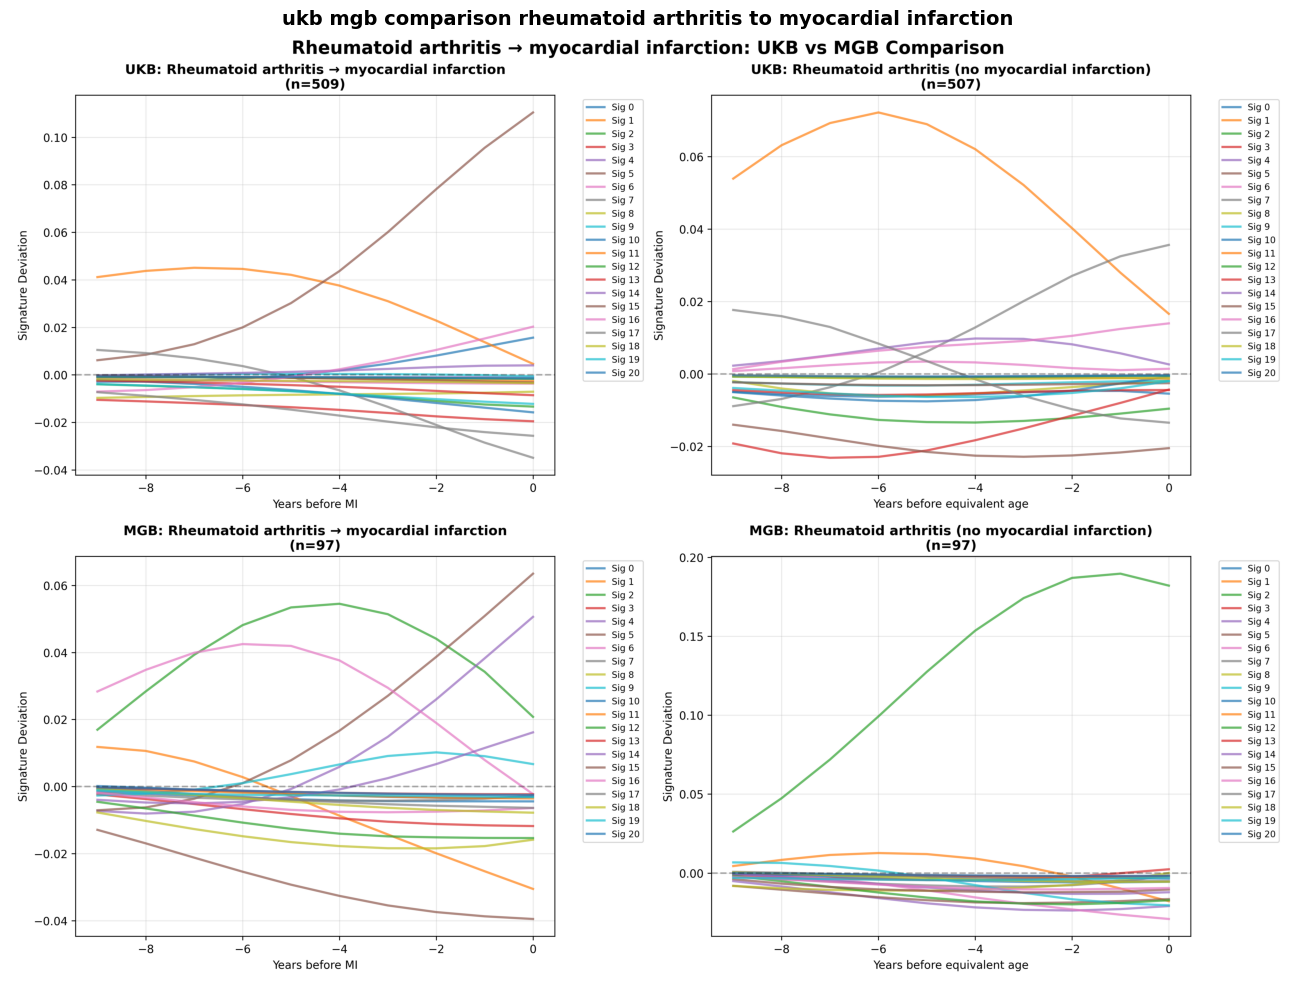


REPRODUCIBILITY VISUALIZATIONS

📊 pathway_reproducibility_ukb_mgb.png


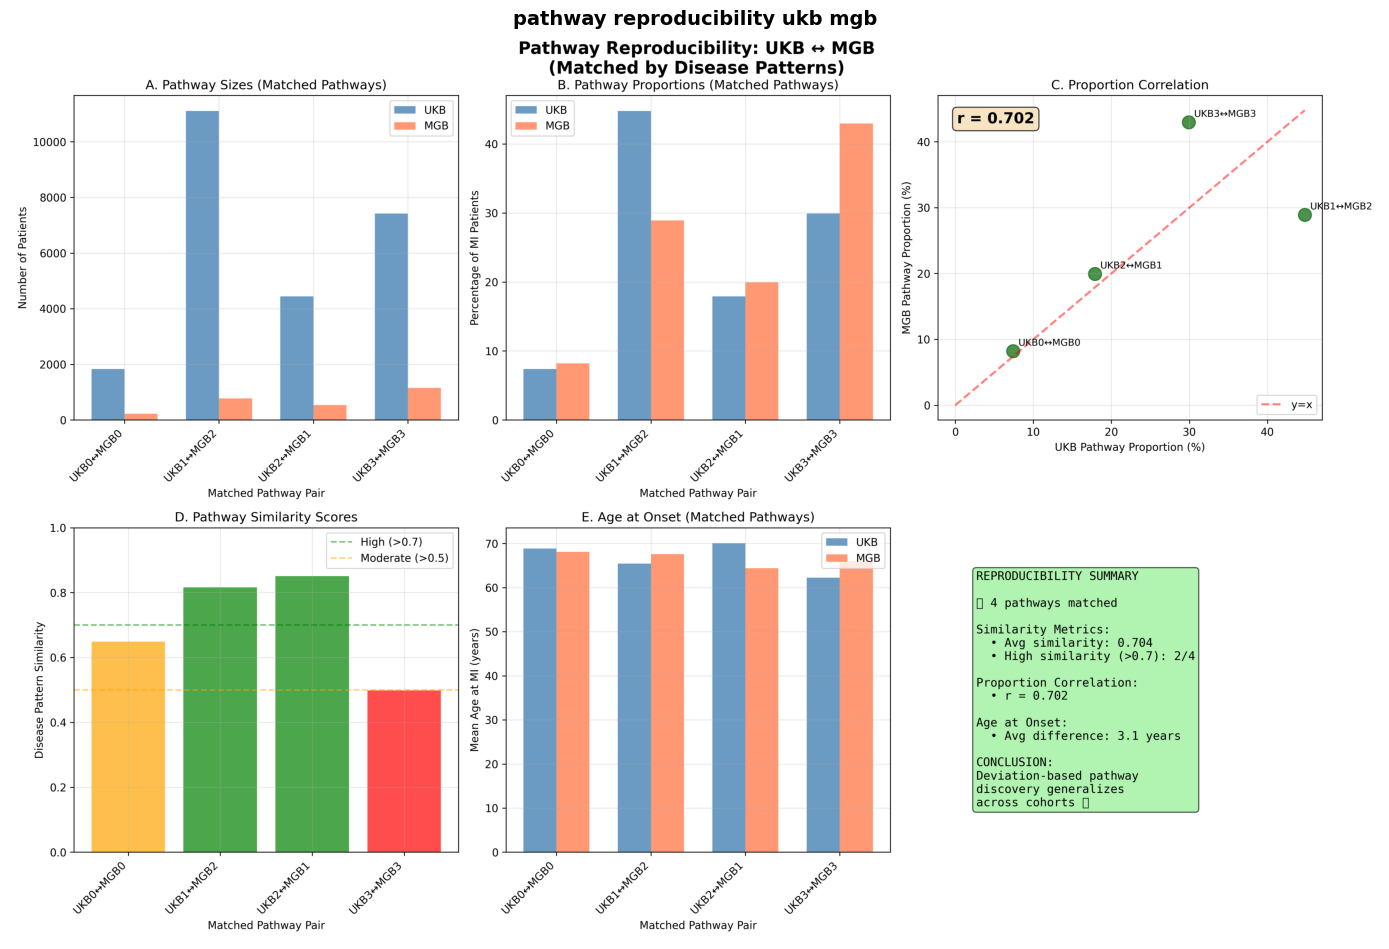


📊 signature_deviation_trajectories_all_sigs_ukb_mgb.png


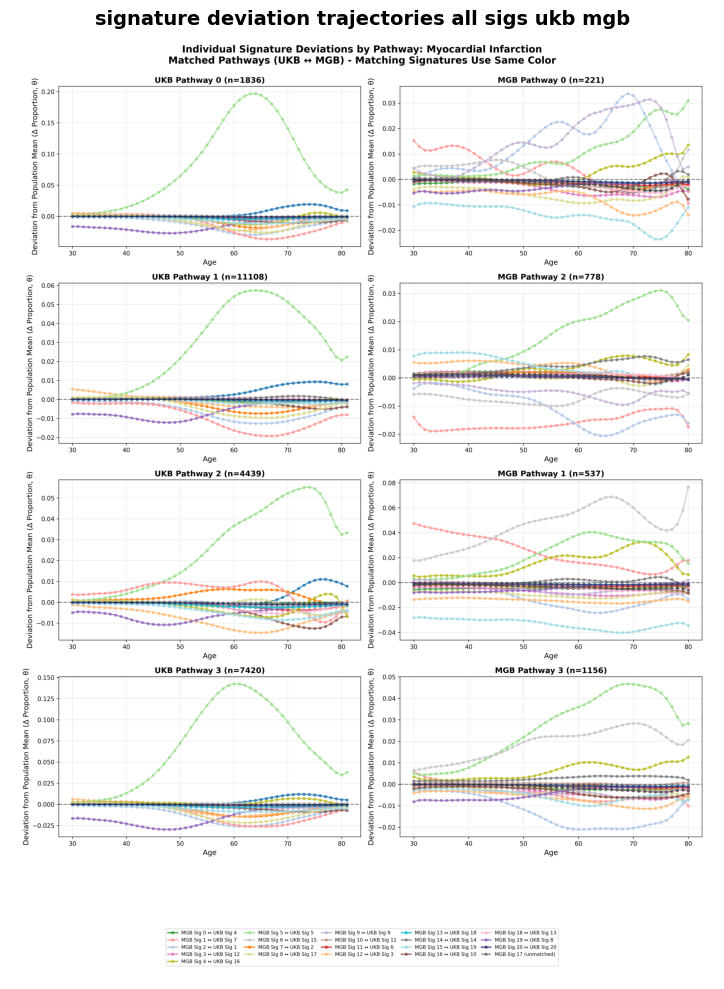


📊 signature_deviation_heatmaps_all_sigs_ukb_mgb.png


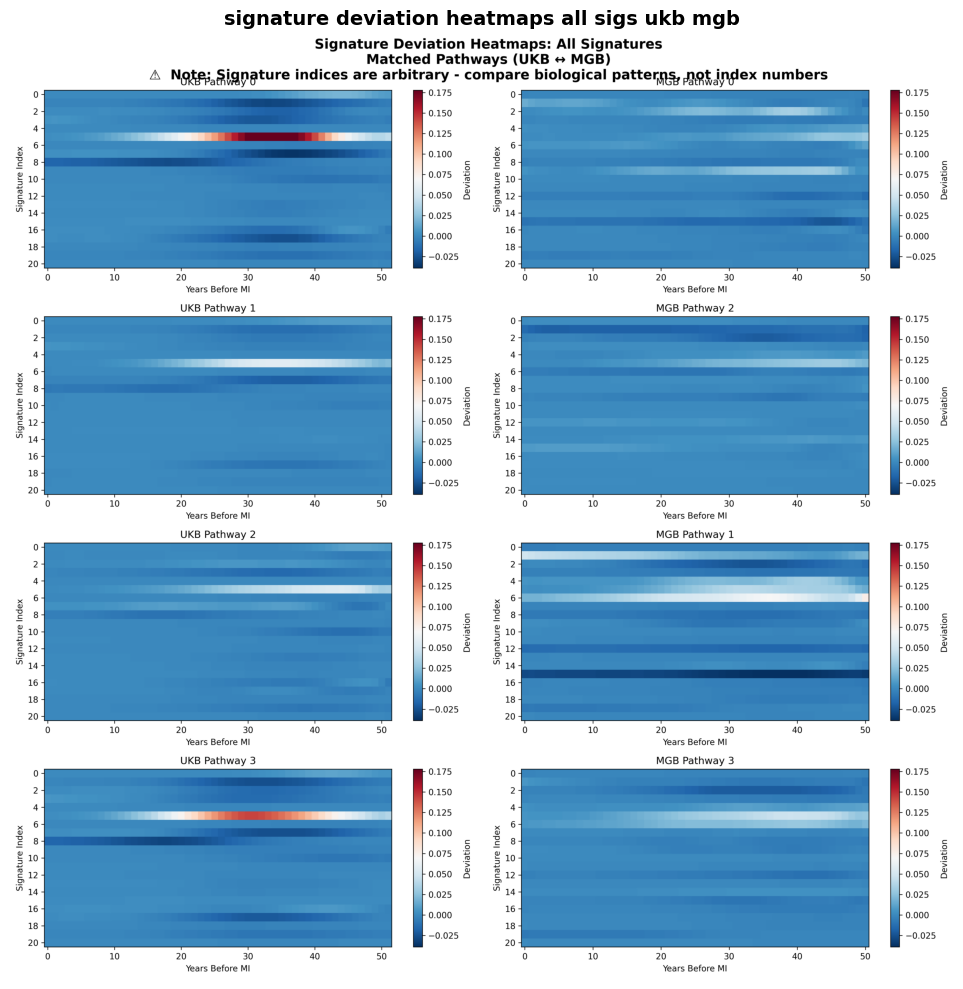

In [9]:
# ============================================================================
# DISPLAY ADDITIONAL VISUALIZATIONS
# ============================================================================

# Check for transition analysis visualizations
transition_path = Path(output_dir) / 'transition_analysis'
if transition_path.exists():
    print("="*80)
    print("TRANSITION ANALYSIS VISUALIZATIONS")
    print("="*80)
    
    transition_figs = [
        'ukb_mgb_comparison_rheumatoid_arthritis_to_myocardial_infarction.png'
    ]
    
    for fig_name in transition_figs:
        fig_path = transition_path / fig_name
        if fig_path.exists():
            print(f"\n📊 {fig_name}")
            try:
                img = mpimg.imread(fig_path)
                plt.figure(figsize=(14, 10))
                plt.imshow(img)
                plt.axis('off')
                plt.title(fig_name.replace('_', ' ').replace('.png', ''), fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"   ⚠️  Could not display: {e}")

# Check for reproducibility visualizations (in current directory)
reproducibility_figs = [
    'pathway_reproducibility_ukb_mgb.png',
    'signature_deviation_trajectories_all_sigs_ukb_mgb.png',
    'signature_deviation_heatmaps_all_sigs_ukb_mgb.png'
]

print("\n" + "="*80)
print("REPRODUCIBILITY VISUALIZATIONS")
print("="*80)

for fig_name in reproducibility_figs:
    fig_path = Path(fig_name)
    if fig_path.exists():
        print(f"\n📊 {fig_name}")
        try:
            img = mpimg.imread(fig_path)
            plt.figure(figsize=(14, 10))
            plt.imshow(img)
            plt.axis('off')
            plt.title(fig_name.replace('_', ' ').replace('.png', ''), fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"   ⚠️  Could not display: {e}")
    else:
        print(f"\n⚠️  {fig_name} (not found - may need to run reproducibility analysis)")


## Summary: Heterogeneity Demonstrated

This pathway analysis demonstrates all three types of heterogeneity:

1. **Patient Heterogeneity**: Different MI patients have different signature profiles
   - Multiple distinct pathways identified
   - Each pathway represents a subset of MI patients

2. **Biological Heterogeneity**: Same phenotype (MI) arises from different mechanisms
   - Different pathways show distinct signature patterns
   - Different disease associations
   - Different biological processes

3. **Disease Heterogeneity**: "MI" is not a single entity
   - Different pathways show different disease associations
   - Different genetic risk profiles (if PRS data available)
   - Different signature activation patterns

**Key Finding**: Our model captures this heterogeneity through individual-specific signature loadings, allowing us to identify distinct biological pathways that lead to the same clinical outcome.


In [10]:
# ============================================================================
# LIST ALL GENERATED FILES
# ============================================================================

print("="*80)
print("COMPLETE FILE LISTING")
print("="*80)

if output_path.exists():
    print(f"\n📁 Output directory: {output_path}")
    print(f"\nGenerated files:")
    
    # List all files
    all_files = sorted(output_path.glob('*'))
    pdf_files = [f for f in all_files if f.suffix == '.pdf']
    png_files = [f for f in all_files if f.suffix == '.png']
    csv_files = [f for f in all_files if f.suffix == '.csv']
    txt_files = [f for f in all_files if f.suffix == '.txt']
    
    if pdf_files:
        print(f"\n  PDF files ({len(pdf_files)}):")
        for f in pdf_files:
            print(f"    - {f.name}")
    
    if png_files:
        print(f"\n  PNG files ({len(png_files)}):")
        for f in png_files:
            print(f"    - {f.name}")
    
    if csv_files:
        print(f"\n  CSV files ({len(csv_files)}):")
        for f in csv_files:
            print(f"    - {f.name}")
    
    if txt_files:
        print(f"\n  TXT files ({len(txt_files)}):")
        for f in txt_files:
            print(f"    - {f.name}")
else:
    print(f"\n⚠️  Output directory not found: {output_path}")
    print("   Run the analysis cell above first!")

print("\n💡 Key Insight:")
print("   This analysis demonstrates biological heterogeneity:")
print("   - Patient Heterogeneity: Different patients have different signature profiles")
print("   - Biological Heterogeneity: Same phenotype (MI) from different mechanisms")
print("   - Disease Heterogeneity: 'MI' is not a single entity")


COMPLETE FILE LISTING

📁 Output directory: complete_pathway_analysis_output/ukb_pathway_discovery

Generated files:

  PDF files (9):
    - comprehensive_pathway_comparison_myocardial_infarction.pdf
    - fh_carrier_prevalence_by_pathway_myocardial_infarction.pdf
    - pathway_size_and_age.pdf
    - prs_by_pathway.pdf
    - signature5_analysis_myocardial_infarction.pdf
    - signature_deviations_by_pathway.pdf
    - signature_deviations_myocardial_infarction_10yr_line.pdf
    - signature_deviations_myocardial_infarction_10yr_stacked.pdf
    - top_discriminating_signatures.pdf

  TXT files (2):
    - analysis_summary.txt
    - complete_analysis_log.txt

💡 Key Insight:
   This analysis demonstrates biological heterogeneity:
   - Patient Heterogeneity: Different patients have different signature profiles
   - Biological Heterogeneity: Same phenotype (MI) from different mechanisms
   - Disease Heterogeneity: 'MI' is not a single entity


## Methodological Note

**Important distinction from main paper:**

- **This analysis**: Uses deviation-from-reference clustering for pathway discovery
  - Clusters patients based on how their signature trajectories deviate from population average
  - Removes age confounding by centering on population reference
  - Useful for identifying distinct biological pathways

- **Main paper** (line 238): Uses k-means clustering on time-averaged signature loadings
  - Clusters patients based on their average signature levels across time
  - Then visualizes deviations from reference over time
  - More interpretable for clinical applications

Both approaches demonstrate heterogeneity, but serve different purposes:
- Deviation-based: Better for pathway discovery (identifying distinct mechanisms)
- Time-averaged: Better for patient stratification (identifying risk groups)

## References

- Main pathway analysis: `heterogeneity_analysis_summary.ipynb`
- Pathway discovery code: `run_complete_pathway_analysis_deviation_only.py`
- Related heterogeneity discussion: `R3_Q8_Heterogeneity.ipynb`
- Main paper method: `trajectory_and_prs_cluster.R` (line 238)